# Analyse et Prédiction du Risque de Diabète

* Les installations :

In [377]:
!pip install imbalanced-learn

* Les imports : 

In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from viz import visualization
from iqr import detecte_outliers_with_iqr
from zscore import detect_outliers_z_score
from knn import knn_imputation, knn_imputation_without_standarisation

from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize
from zscore import detect_remote_outliers_z_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


* Importer dataset :

In [379]:
dataset = pd.read_csv("dataset-diabete.csv")
print(f"dataset : \n{dataset}")

dataset : 
     Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0             0            6      148             72             35        0   
1             1            1       85             66             29        0   
2             2            8      183             64              0        0   
3             3            1       89             66             23       94   
4             4            0      137             40             35      168   
..          ...          ...      ...            ...            ...      ...   
763         763           10      101             76             48      180   
764         764            2      122             70             27        0   
765         765            5      121             72             23      112   
766         766            1      126             60              0        0   
767         767            1       93             70             31        0   

      BMI  DiabetesPedigreeF

## 🎯 Prétraitement des données - Gestion des valeurs manquantes et aberrantes

### 1️⃣ Identifier et traiter les valeurs manquantes dans le jeu de données si elles existent.

*️⃣ utiliser La standarisation Avant knn : 

In [380]:
print("******************** Avant : is null : ****************************** \n", dataset.isnull().sum())
dataset.describe()

******************** Avant : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [381]:
dataset_1 = knn_imputation(dataset)
print("******************** Après : is null : ****************************** \n", dataset_1.isnull().sum())
dataset_1.describe()

******************** Après : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,121.583594,72.289062,28.975260,154.781510,32.404375,0.471876,33.240885
std,221.846794,3.369578,30.497521,12.196650,9.446136,97.969796,6.896876,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,64.000000,22.400000,88.950000,27.400000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,29.000000,134.100000,32.050000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,35.000000,191.050000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


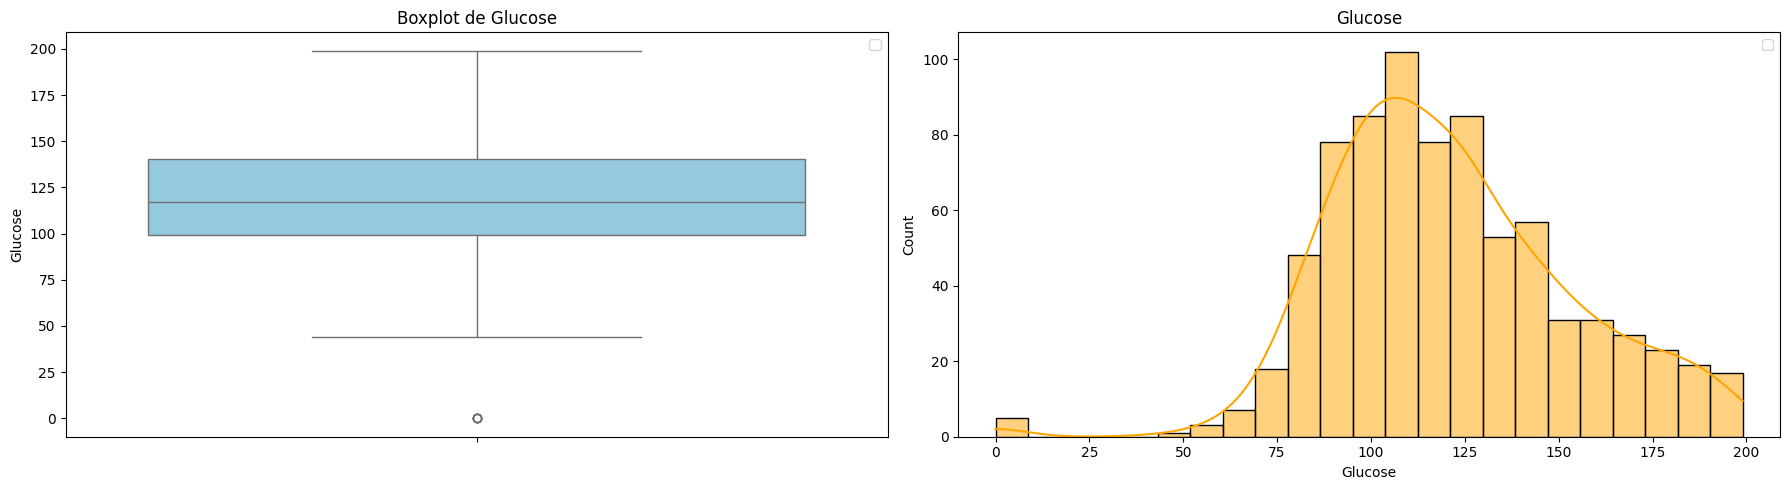

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


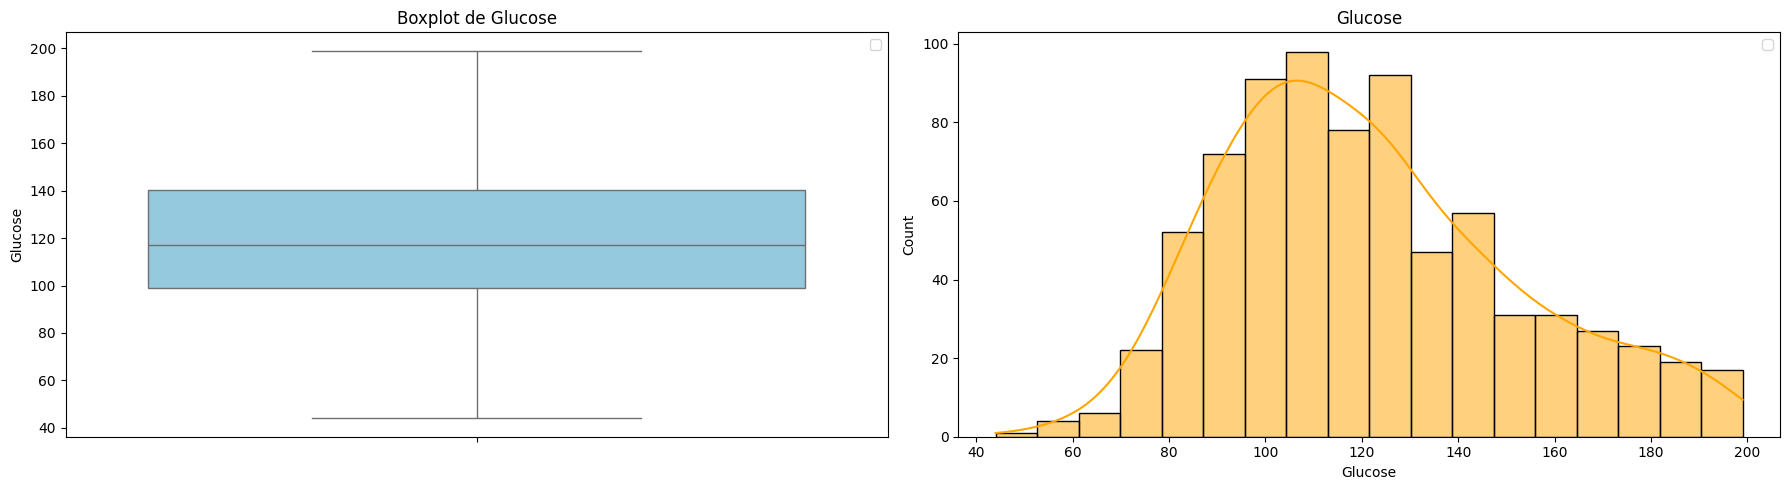

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


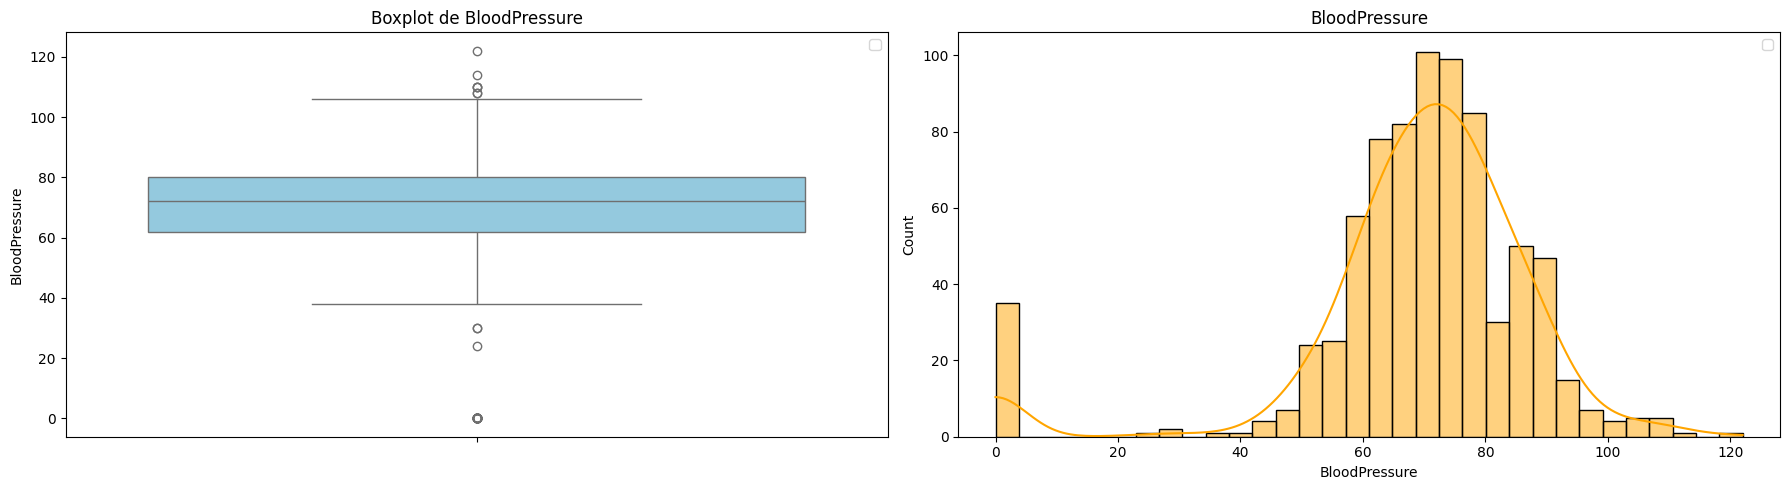

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


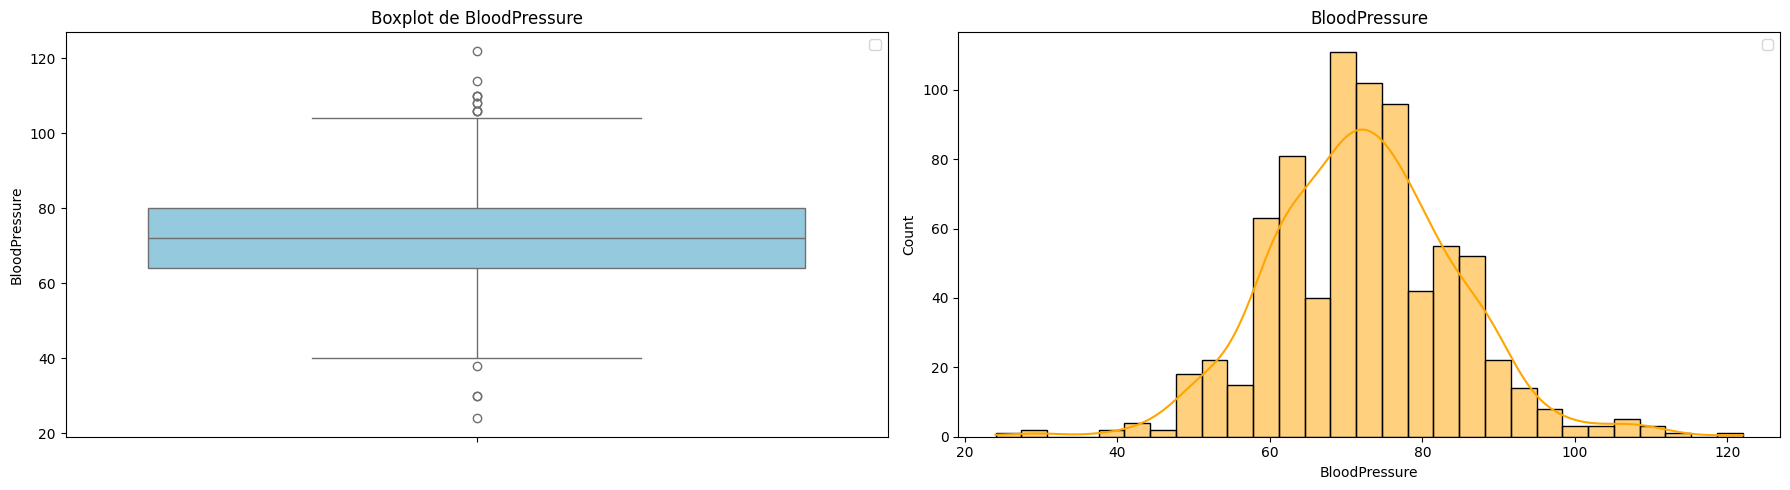

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


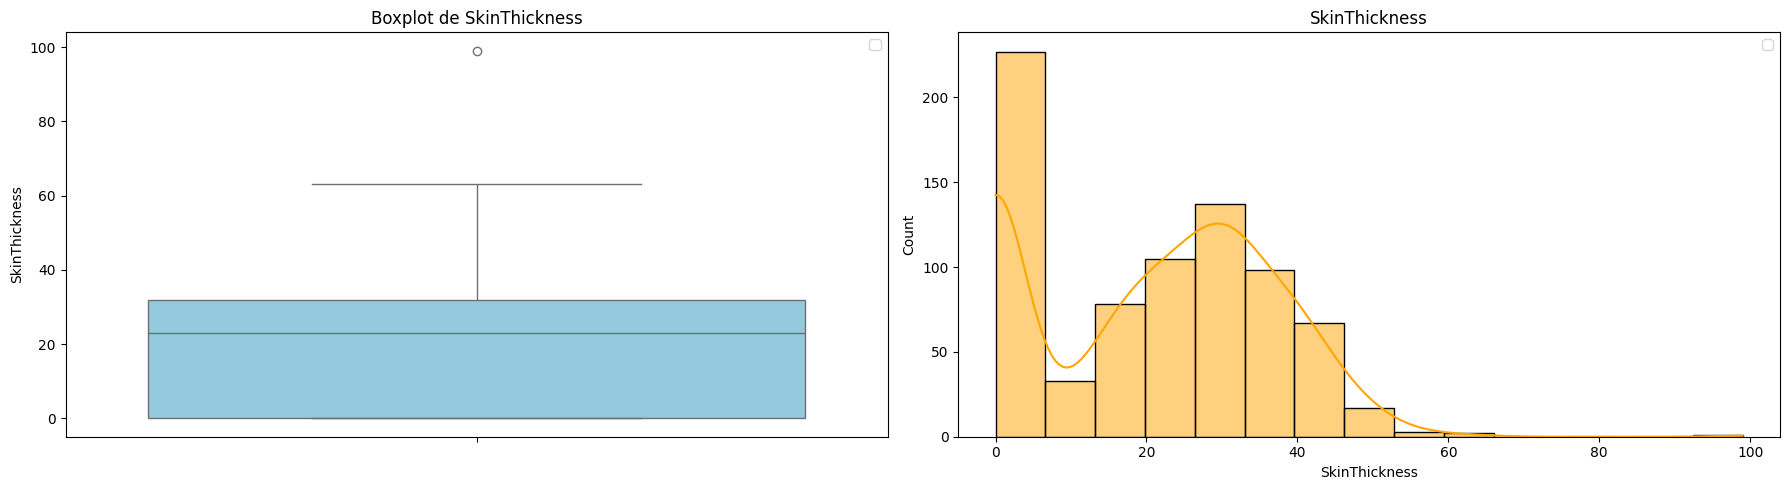

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


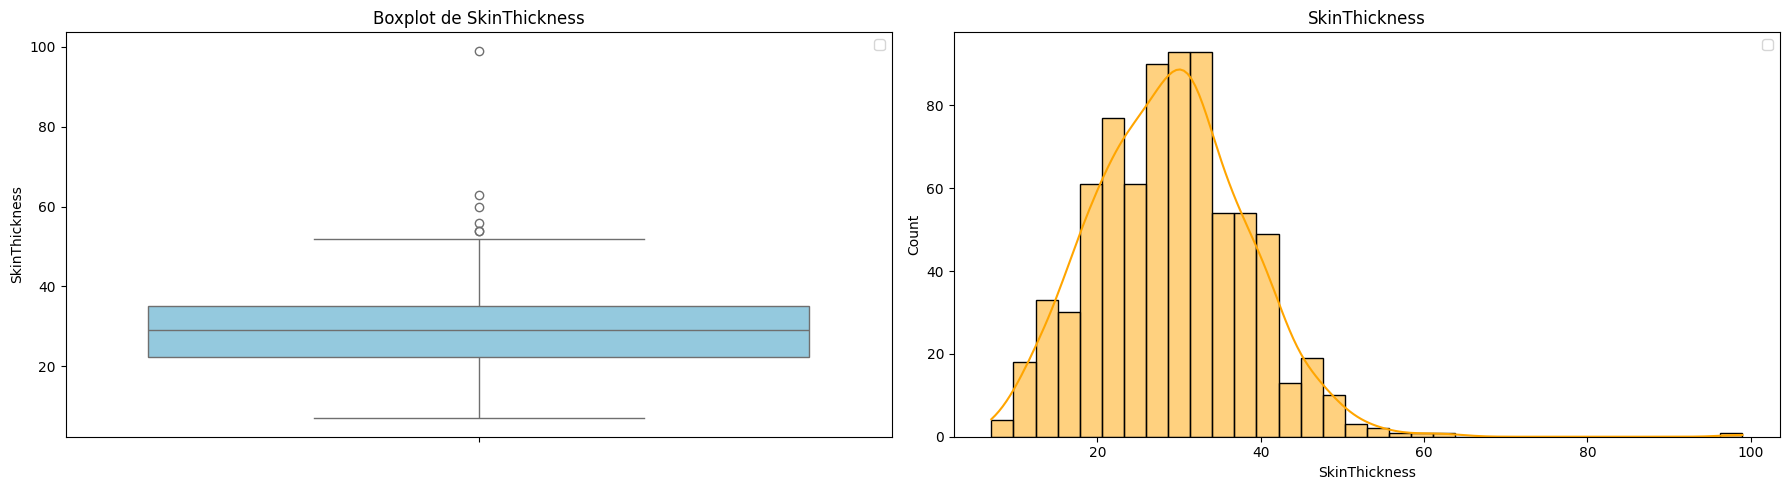

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


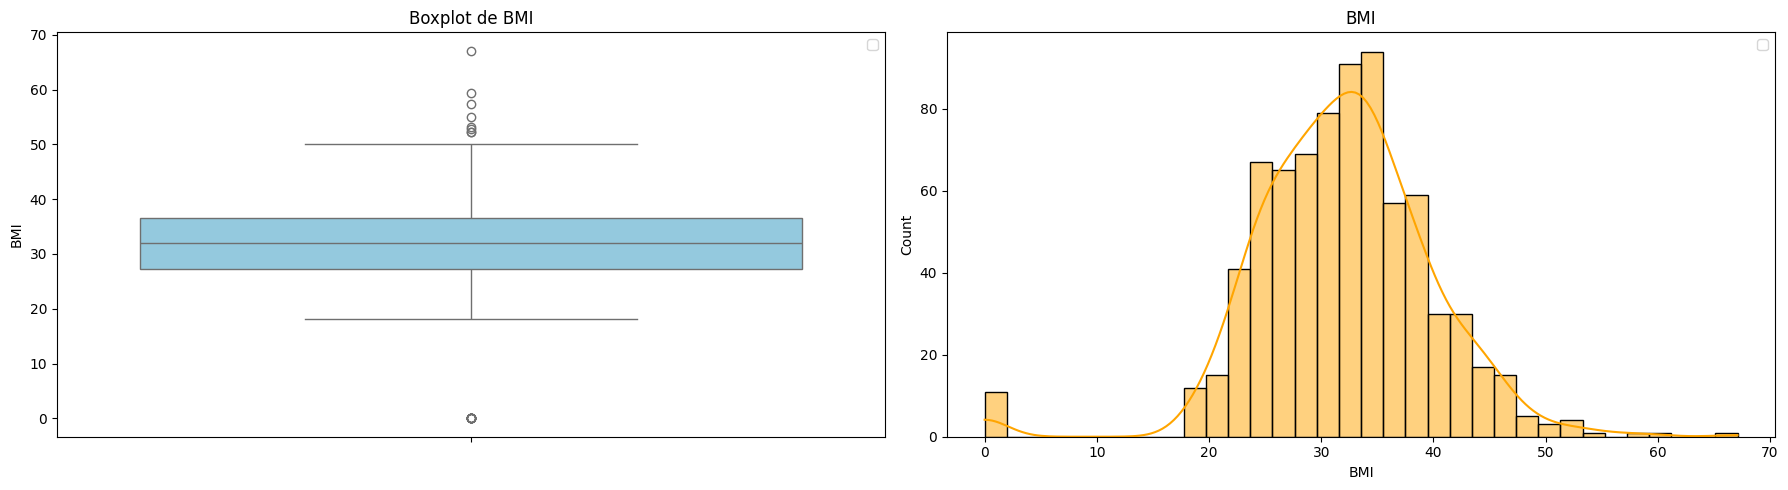

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


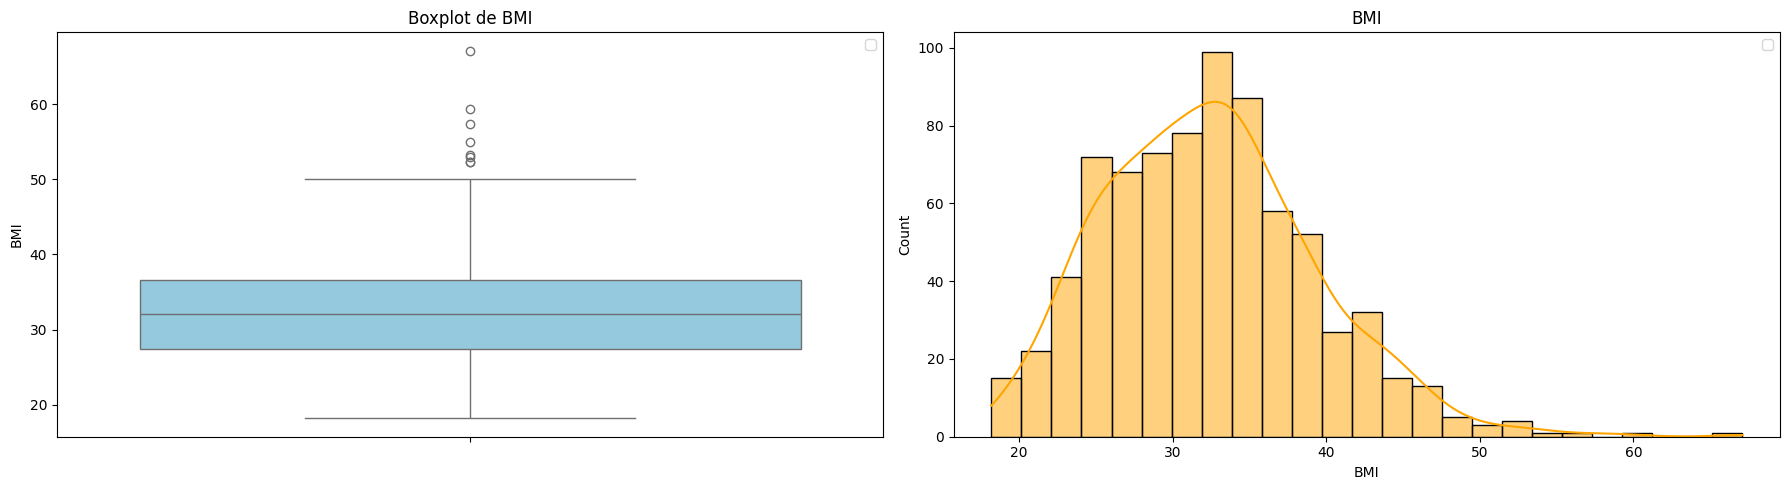

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


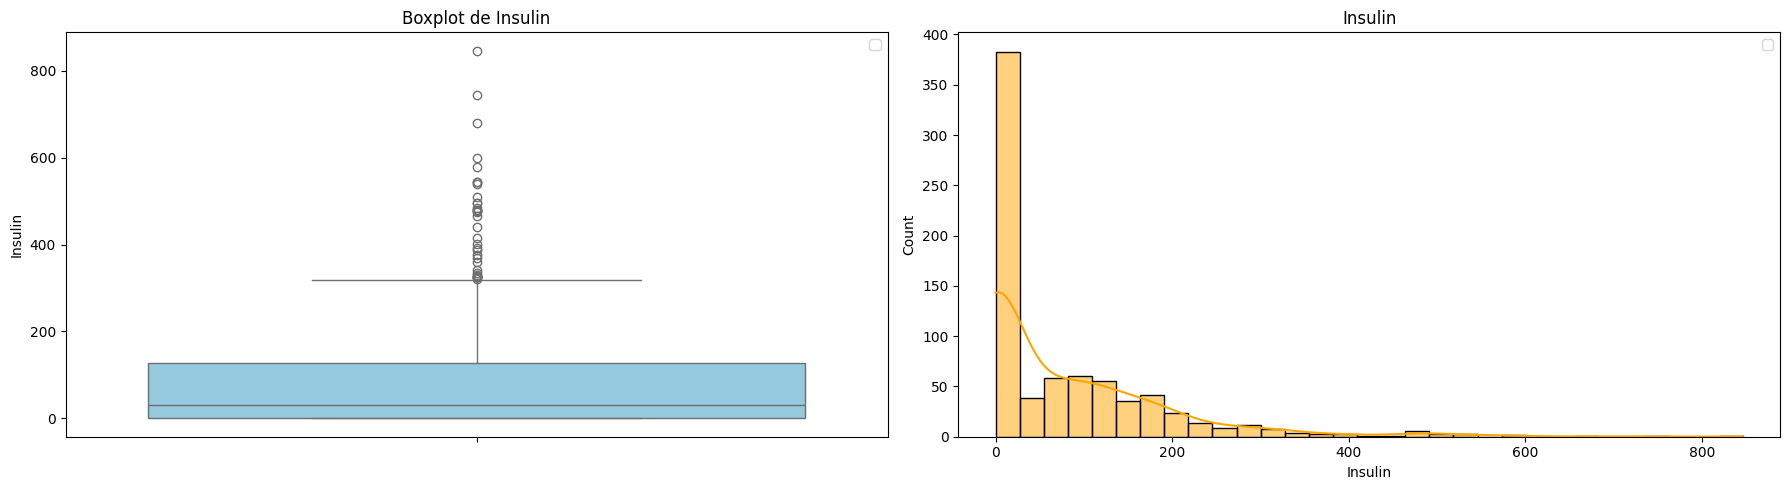

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


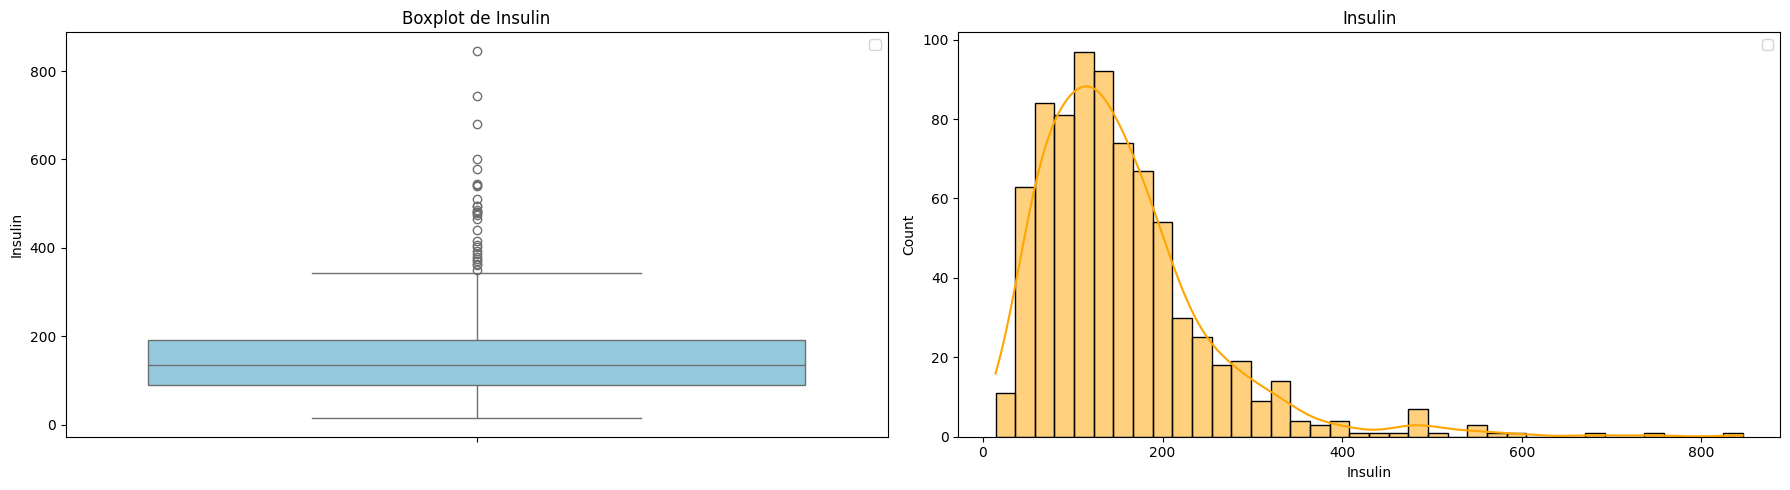

In [382]:
# Après l'application de knn sur les valeurs manquer
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin'] 
for col in columns:
    visualization(dataset, col)
    visualization(dataset_1, col)


*️⃣ Sans utiliser La standarisation Avant knn : 

In [383]:
print("******************** Avant : is null : ****************************** \n", dataset.isnull().sum())
dataset.describe()

******************** Avant : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [384]:
dataset_2 = knn_imputation_without_standarisation(dataset)

In [385]:
print("******************** Après : is null : ****************************** \n", dataset_2.isnull().sum())
dataset_2.describe()

******************** Après : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,121.612760,72.373698,29.203125,153.630990,32.426328,0.471876,33.240885
std,221.846794,3.369578,30.477714,12.193237,9.169946,99.129224,6.896203,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,64.000000,23.000000,90.000000,27.475000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,29.400000,130.000000,32.290000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,34.400000,190.000000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### 2️⃣ Utiliser des techniques statistiques (ex. : boîte à moustaches, z-score, IQR) pour détecter les outliers.

IQR (Pregnancies): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  1.0
Q3 (75%) :  6.0
IQR :  5.0
Nombre des outliers détectés : 86
Pourcentage f'outliers: 12.61%
Limites: [-6.50, 8.50]]
La distribution des Pregnancies avec les bornes sup/inf :


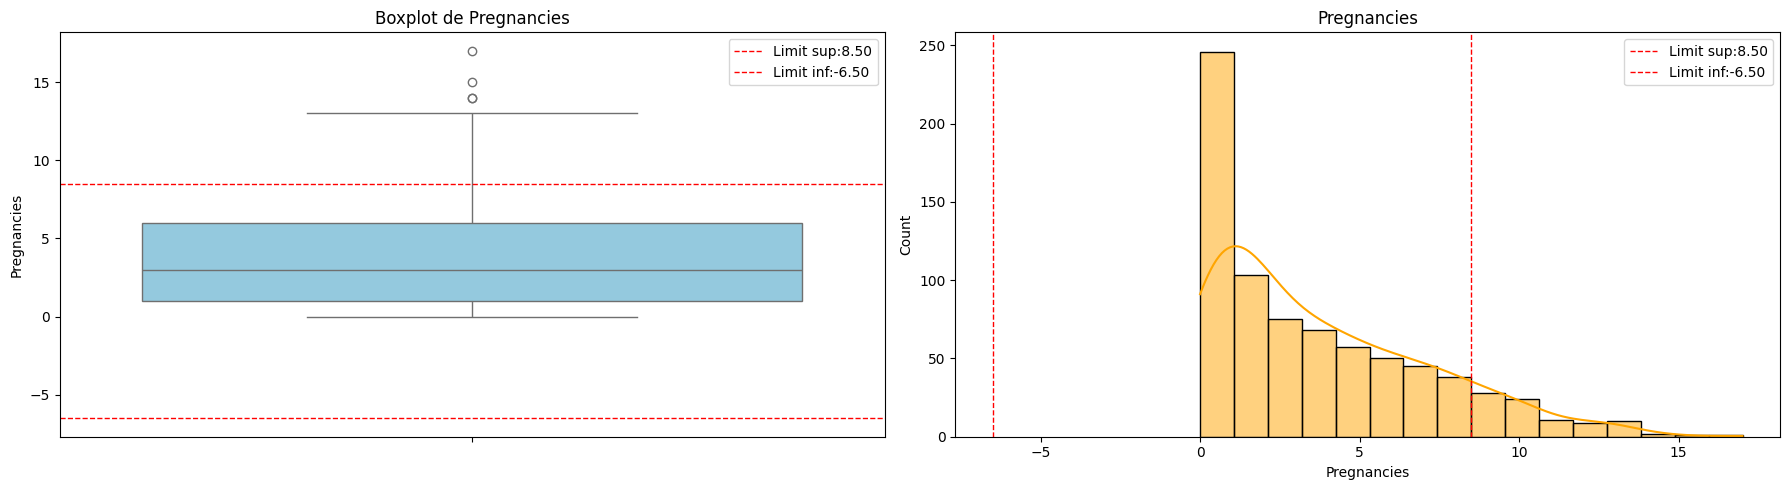

Z-SCORE (Pregnancies): *******************************************************************************************
Moyenne: 3.85
Ecart-type: 3.37
Seuil Z-SCORE: 3
Nombre des outliers détectés : 4
Pourcentage f'outliers: 0.52%
Limites: [-6.26, 13.95]
La distribution des Pregnancies avec les bornes sup/inf :


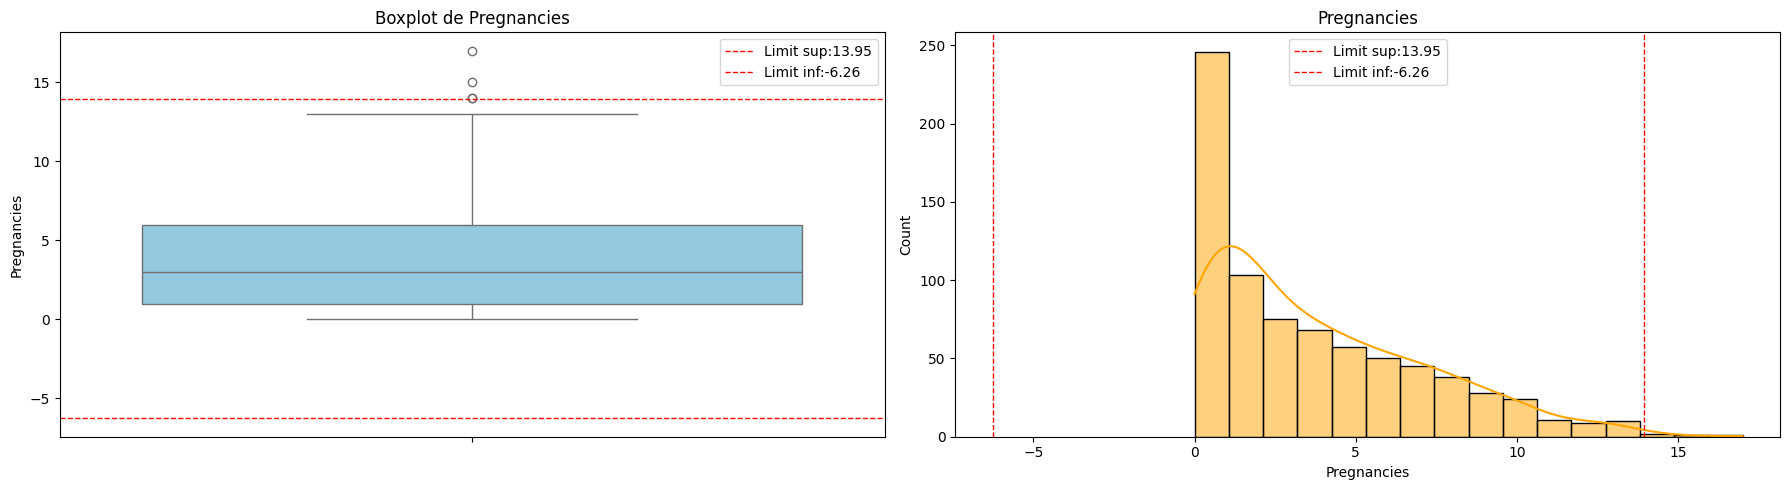

IQR (Glucose): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  99.0
Q3 (75%) :  140.25
IQR :  41.25
Nombre des outliers détectés : 101
Pourcentage f'outliers: 15.14%
Limites: [37.12, 160.88]]
La distribution des Glucose avec les bornes sup/inf :


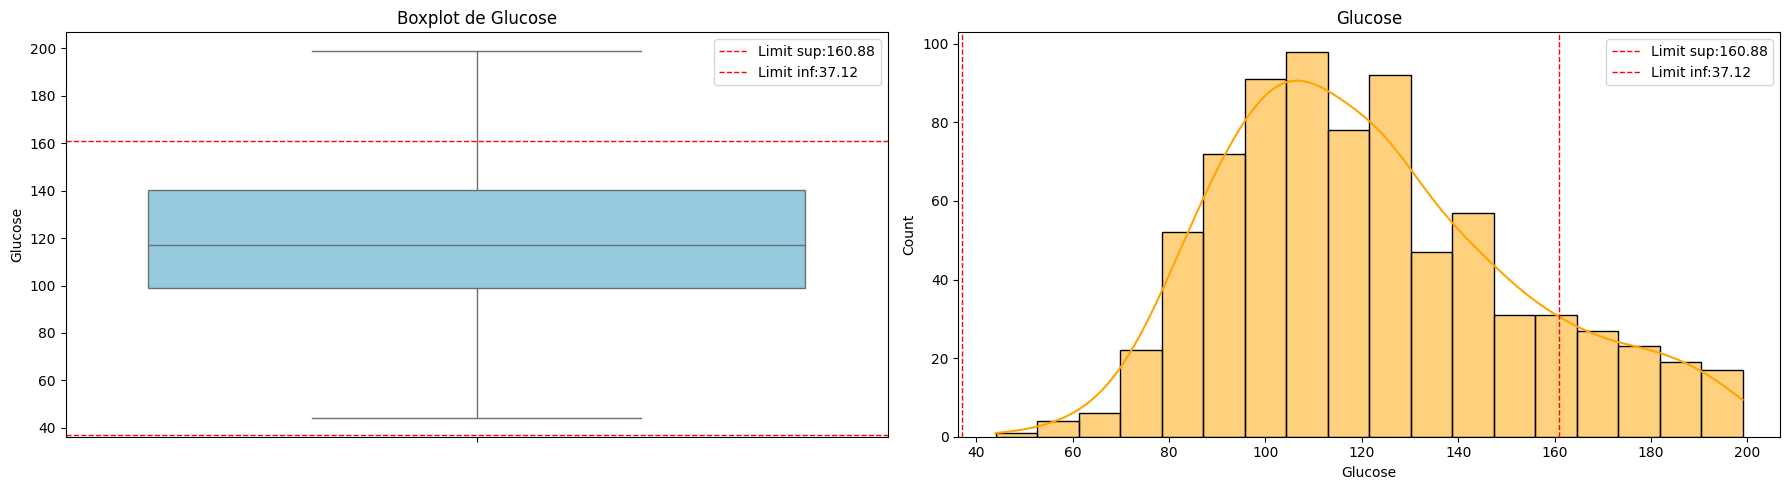

Z-SCORE (Glucose): *******************************************************************************************
Moyenne: 121.58
Ecart-type: 30.50
Seuil Z-SCORE: 3
Nombre des outliers détectés : 0
Pourcentage f'outliers: 0.00%
Limites: [30.09, 213.08]
La distribution des Glucose avec les bornes sup/inf :


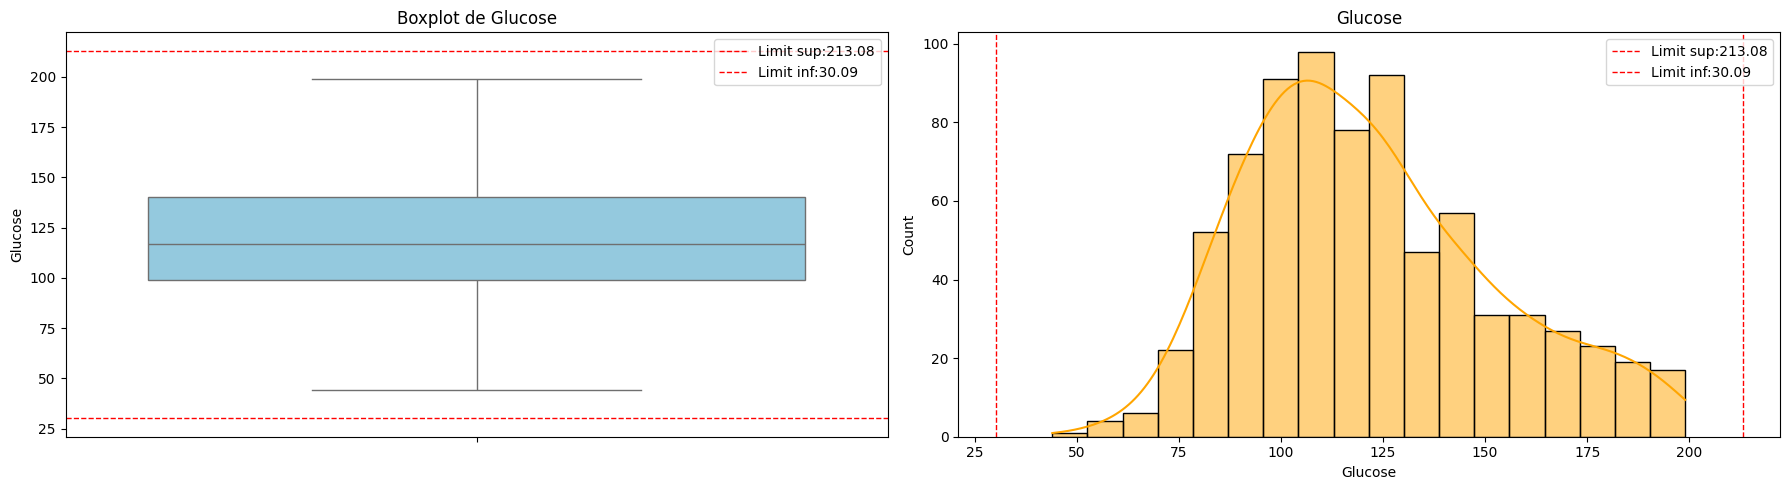

IQR (BloodPressure): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  64.0
Q3 (75%) :  80.0
IQR :  16.0
Nombre des outliers détectés : 64
Pourcentage f'outliers: 9.09%
Limites: [40.00, 88.00]]
La distribution des BloodPressure avec les bornes sup/inf :


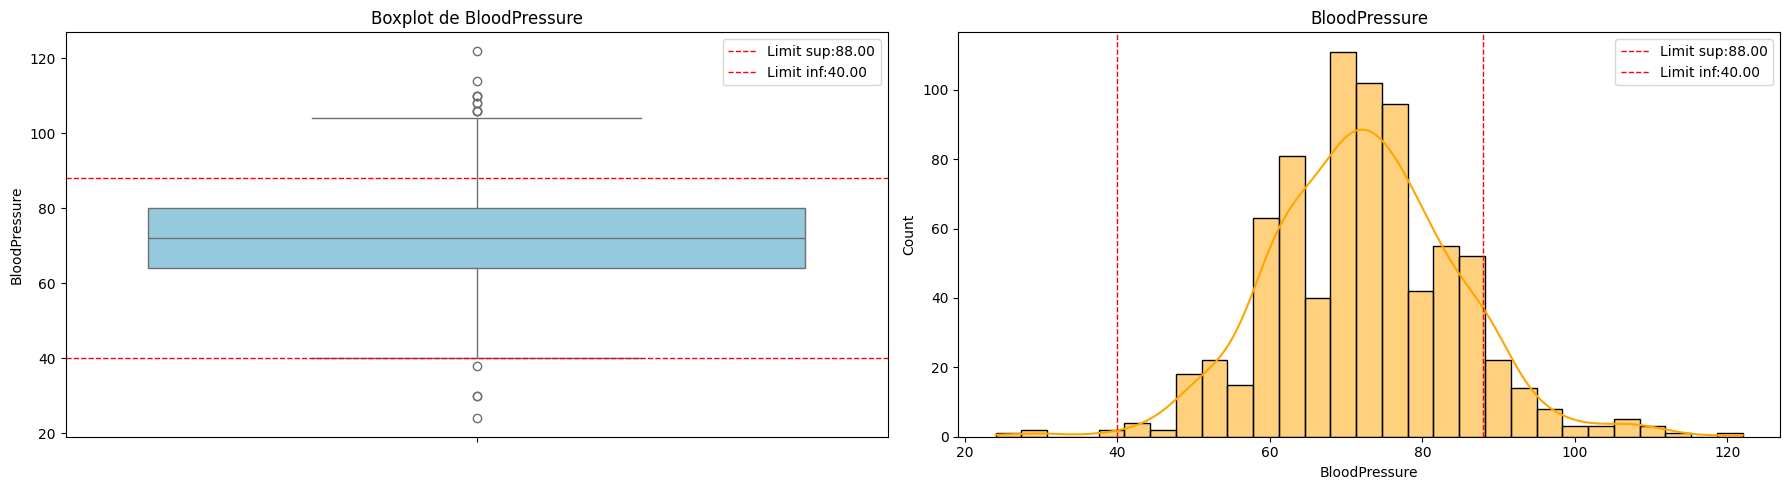

Z-SCORE (BloodPressure): *******************************************************************************************
Moyenne: 72.29
Ecart-type: 12.20
Seuil Z-SCORE: 3
Nombre des outliers détectés : 8
Pourcentage f'outliers: 1.05%
Limites: [35.70, 108.88]
La distribution des BloodPressure avec les bornes sup/inf :


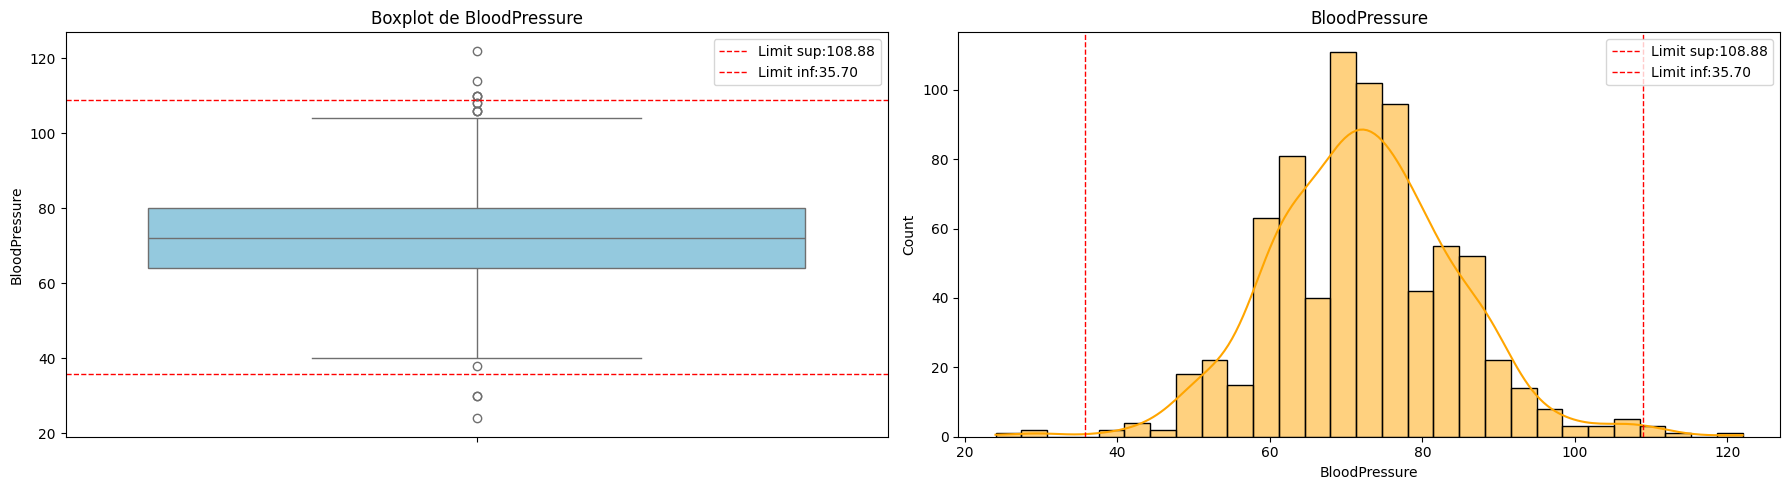

IQR (SkinThickness): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  22.400000000000002
Q3 (75%) :  35.0
IQR :  12.599999999999998
Nombre des outliers détectés : 66
Pourcentage f'outliers: 9.40%
Limites: [3.50, 41.30]]
La distribution des SkinThickness avec les bornes sup/inf :


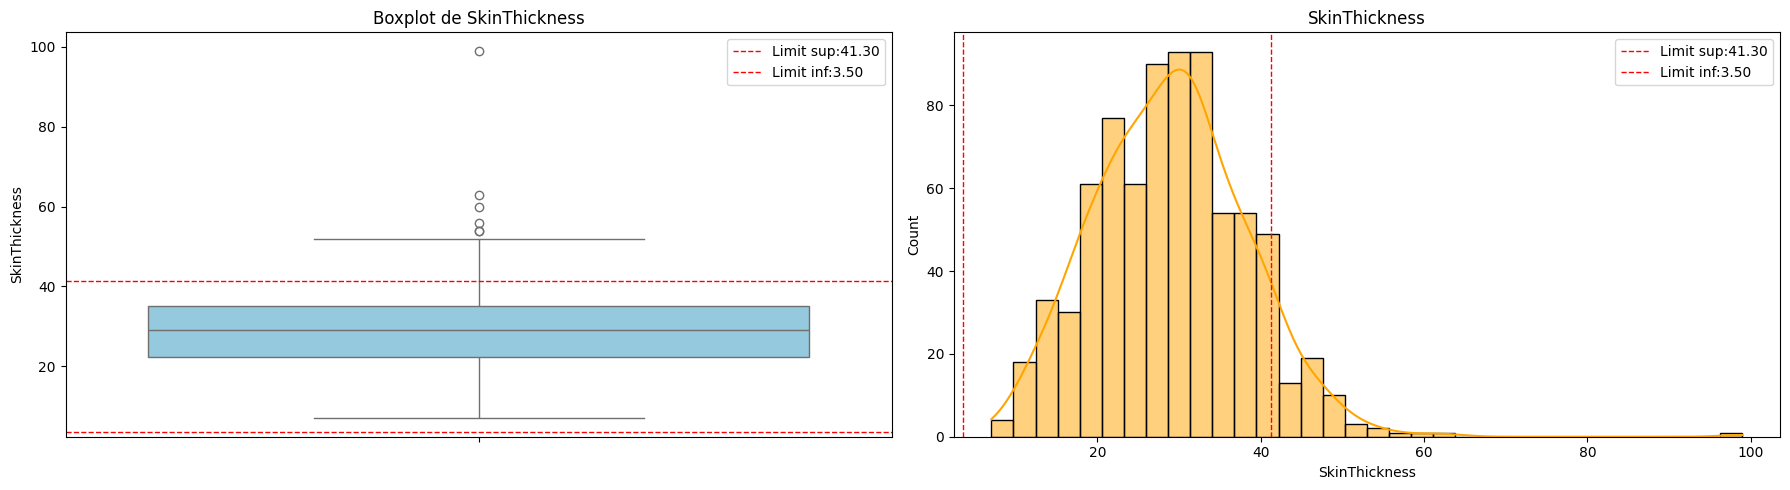

Z-SCORE (SkinThickness): *******************************************************************************************
Moyenne: 28.98
Ecart-type: 9.45
Seuil Z-SCORE: 3
Nombre des outliers détectés : 3
Pourcentage f'outliers: 0.39%
Limites: [0.64, 57.31]
La distribution des SkinThickness avec les bornes sup/inf :


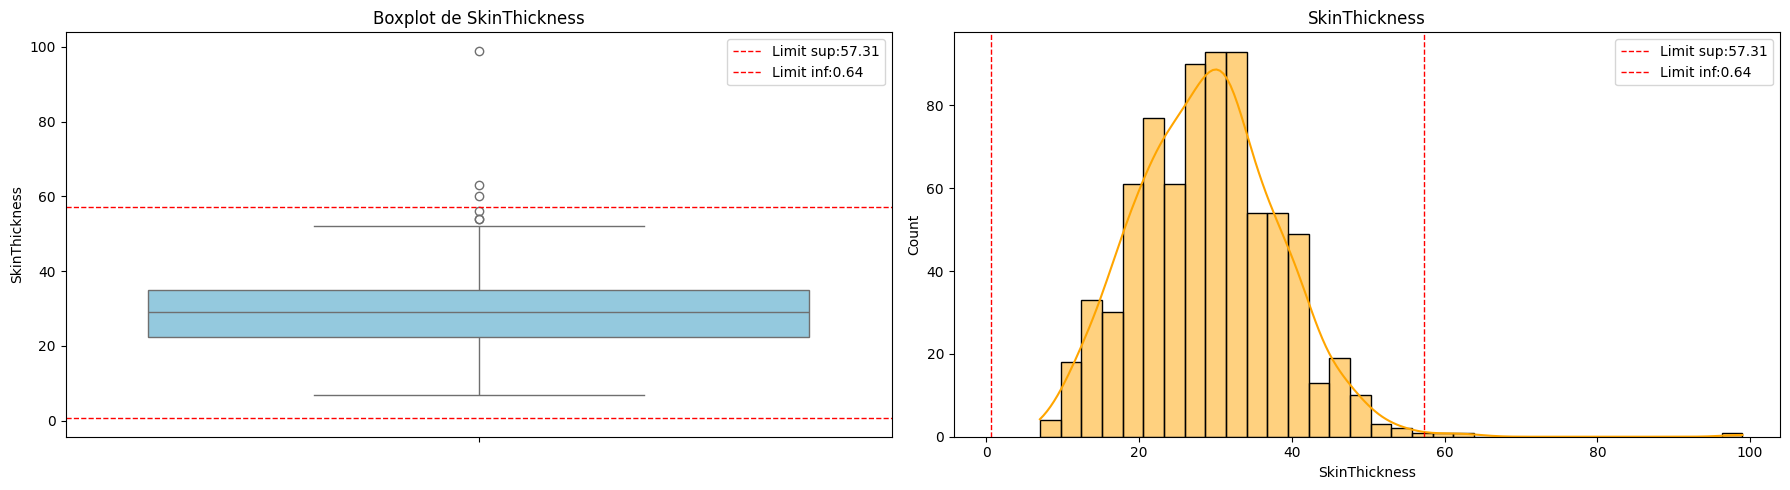

IQR (Insulin): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  88.95
Q3 (75%) :  191.05
IQR :  102.10000000000001
Nombre des outliers détectés : 103
Pourcentage f'outliers: 15.49%
Limites: [-64.20, 242.10]]
La distribution des Insulin avec les bornes sup/inf :


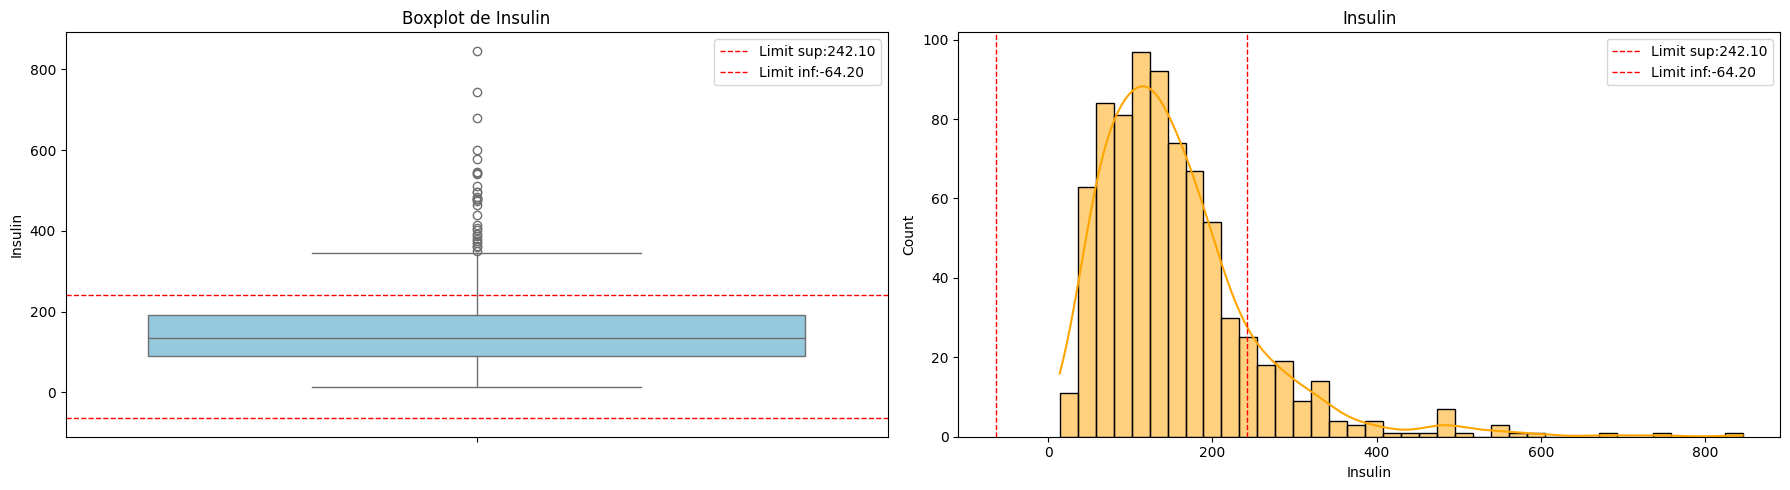

Z-SCORE (Insulin): *******************************************************************************************
Moyenne: 154.78
Ecart-type: 97.97
Seuil Z-SCORE: 3
Nombre des outliers détectés : 17
Pourcentage f'outliers: 2.26%
Limites: [-139.13, 448.69]
La distribution des Insulin avec les bornes sup/inf :


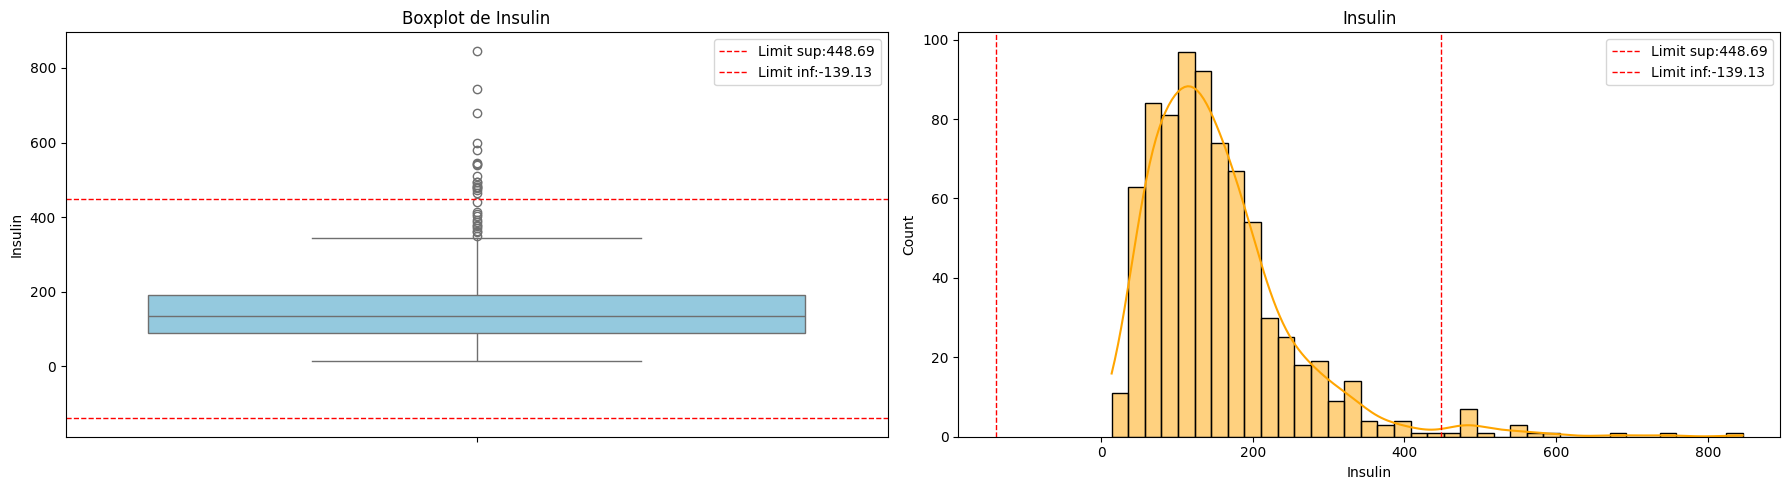

IQR (BMI): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  27.4
Q3 (75%) :  36.6
IQR :  9.200000000000003
Nombre des outliers détectés : 81
Pourcentage f'outliers: 11.79%
Limites: [13.60, 41.20]]
La distribution des BMI avec les bornes sup/inf :


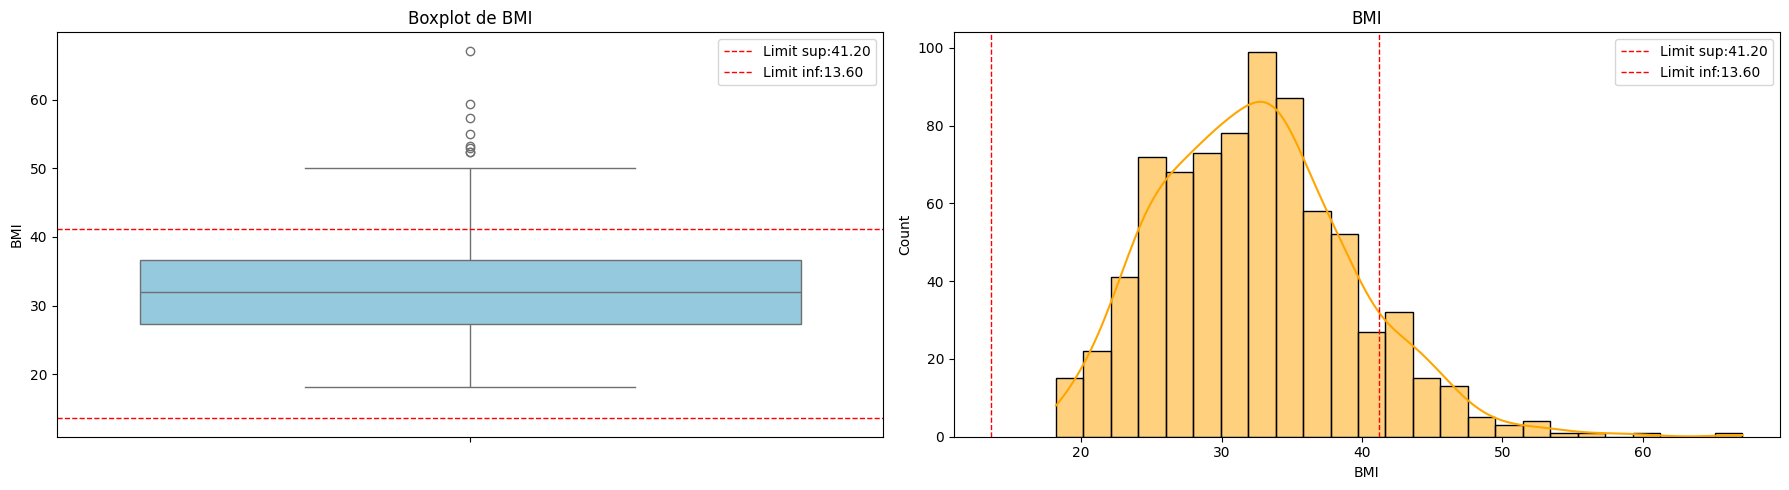

Z-SCORE (BMI): *******************************************************************************************
Moyenne: 32.40
Ecart-type: 6.90
Seuil Z-SCORE: 3
Nombre des outliers détectés : 5
Pourcentage f'outliers: 0.66%
Limites: [11.71, 53.10]
La distribution des BMI avec les bornes sup/inf :


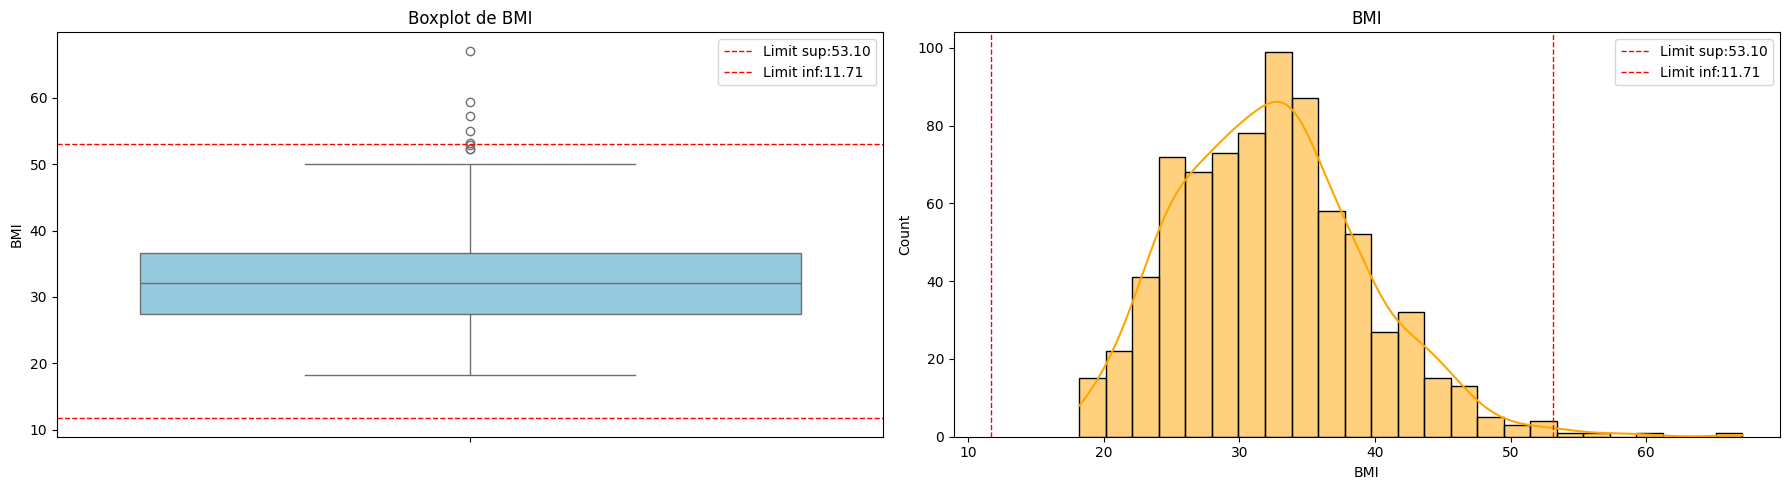

IQR (DiabetesPedigreeFunction): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  0.24375
Q3 (75%) :  0.62625
IQR :  0.38249999999999995
Nombre des outliers détectés : 97
Pourcentage f'outliers: 14.46%
Limites: [-0.33, 0.82]]
La distribution des DiabetesPedigreeFunction avec les bornes sup/inf :


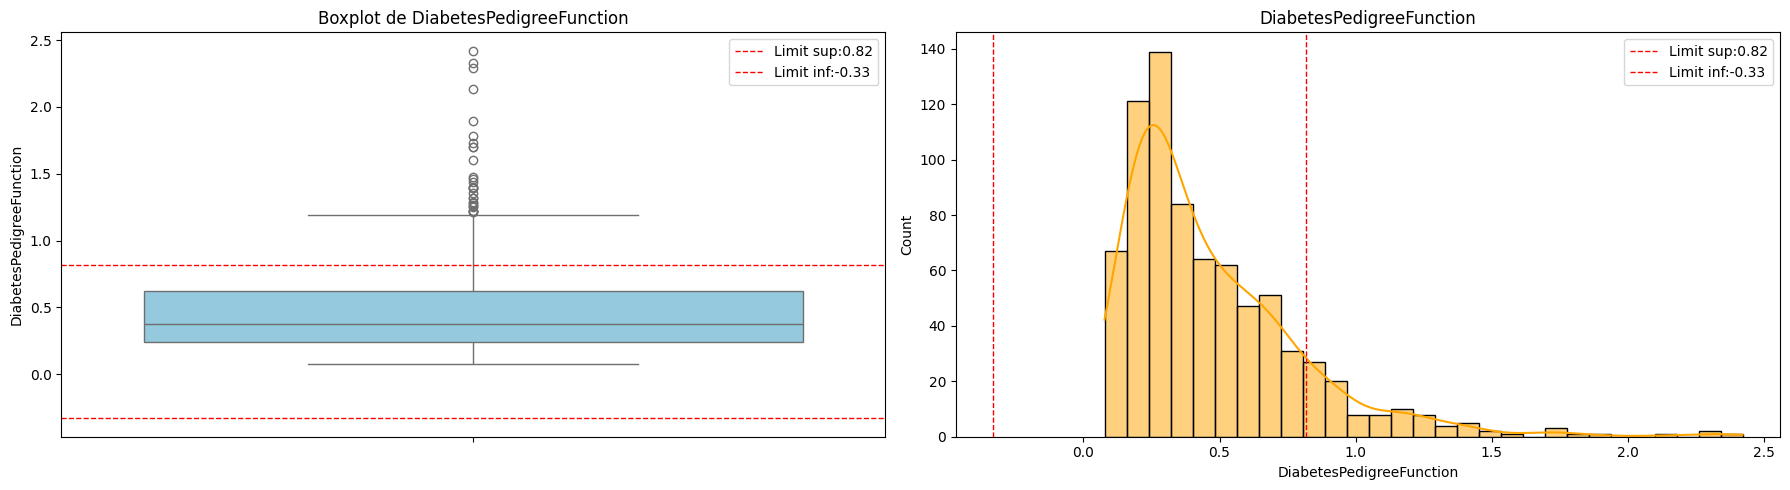

Z-SCORE (DiabetesPedigreeFunction): *******************************************************************************************
Moyenne: 0.47
Ecart-type: 0.33
Seuil Z-SCORE: 3
Nombre des outliers détectés : 11
Pourcentage f'outliers: 1.45%
Limites: [-0.52, 1.47]
La distribution des DiabetesPedigreeFunction avec les bornes sup/inf :


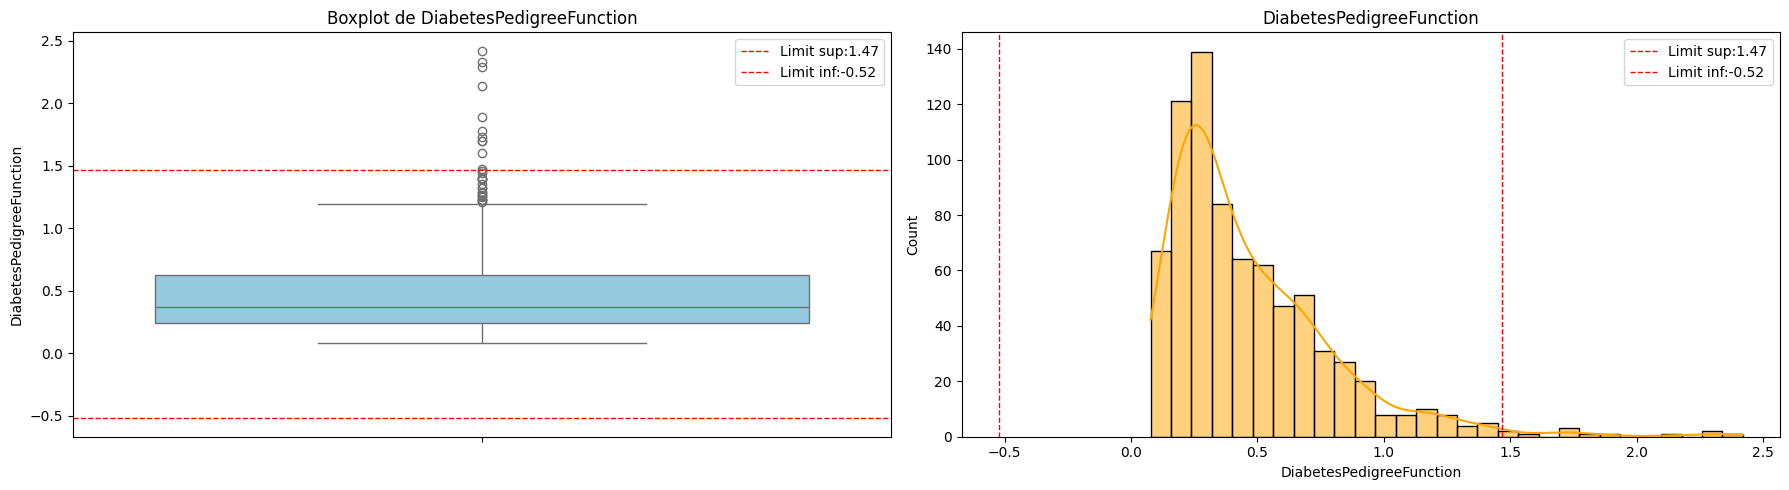

IQR (Age): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  24.0
Q3 (75%) :  41.0
IQR :  17.0
Nombre des outliers détectés : 89
Pourcentage f'outliers: 13.11%
Limites: [-1.50, 49.50]]
La distribution des Age avec les bornes sup/inf :


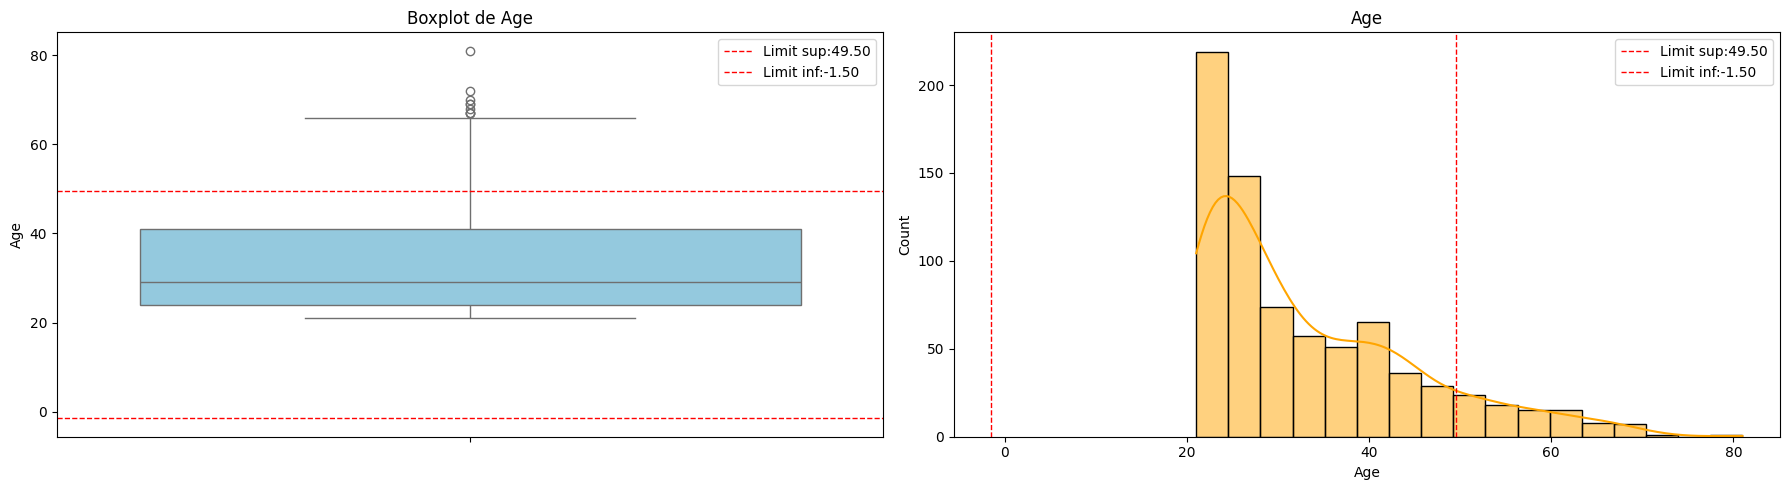

Z-SCORE (Age): *******************************************************************************************
Moyenne: 33.24
Ecart-type: 11.76
Seuil Z-SCORE: 3
Nombre des outliers détectés : 5
Pourcentage f'outliers: 0.66%
Limites: [-2.04, 68.52]
La distribution des Age avec les bornes sup/inf :


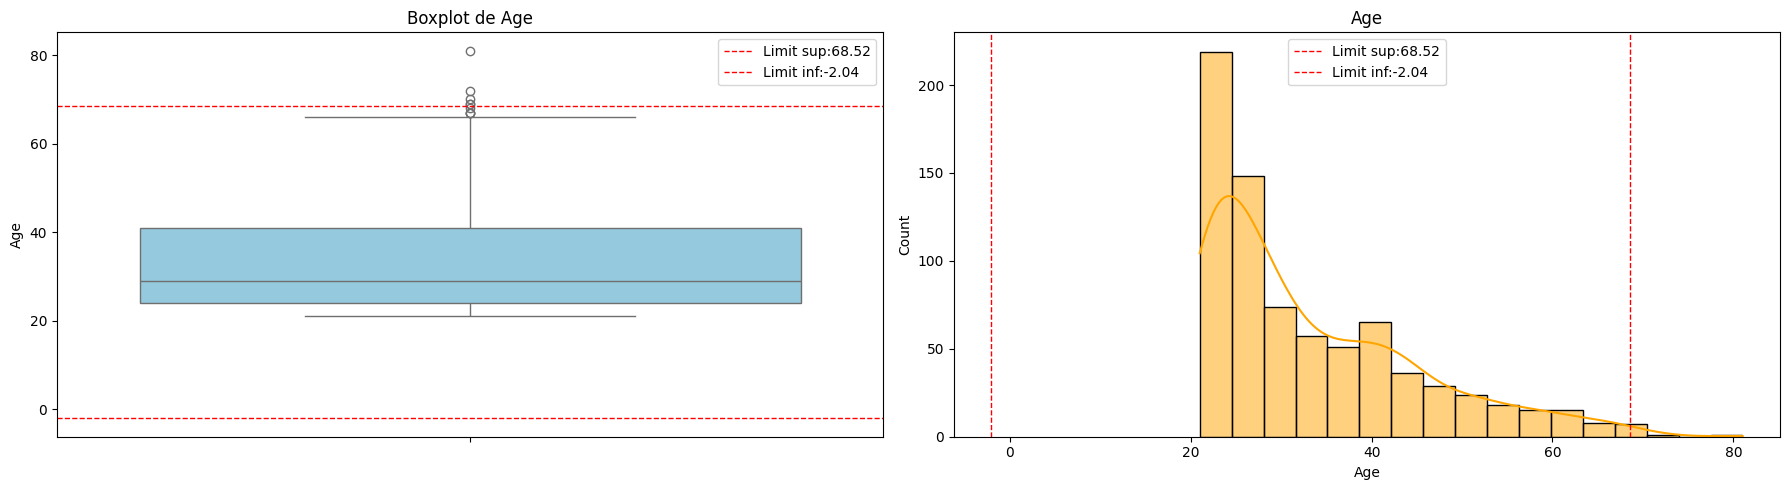

In [386]:
columns_iqr = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
columns_zscore = []
for col in columns_iqr:
    print(f"IQR ({col}): *******************************************************************************************")
    detecte_outliers_with_iqr(dataset_1, col )
    print(f"Z-SCORE ({col}): *******************************************************************************************")
    detect_outliers_z_score(dataset_1, col)

Tableau des résultats : 

<table border="1" style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif;">
    <thead>
        <tr style="background-color: #4CAF50; color: white;">
            <th>Variable</th>
            <th>N Outliers Z-Score</th>
            <th>% Outliers Z-Score</th>
            <th>N Outliers IQR</th>
            <th>% Outliers IQR</th>
            <th>Méthode Choisie</th>
            <th>Justification</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Pregnancies</strong></td>
            <td>4</td>
            <td>0.52%</td>
            <td>86</td>
            <td>12.61%</td>
            <td><strong>Transformation + Z-Score</strong></td>
            <td>Distribution raisonnable, Z-score conserve + de données</td>
        </tr>
        <tr>
            <td><strong>Glucose</strong></td>
            <td>0</td>
            <td>0.00%</td>
            <td>101</td>
            <td>15.14%</td>
            <td><strong>Z-Score</strong></td>
            <td>Aucun outlier avec Z-score, distribution normale</td>
        </tr>
        <tr>
            <td><strong>BloodPressure</strong></td>
            <td>8</td>
            <td>1.05%</td>
            <td>64</td>
            <td>9.09%</td>
            <td><strong>Z-Score</strong></td>
            <td>Z-score moins restrictif, préserve l'information médicale</td>
        </tr>
        <tr>
            <td><strong>SkinThickness</strong></td>
            <td>3</td>
            <td>0.39%</td>
            <td>66</td>
            <td>9.40%</td>
            <td><strong>Z-Score</strong></td>
            <td>Faible % d'outliers avec Z-score, méthode conservative</td>
        </tr>
        <tr style="background-color: #443f2eff;">
            <td><strong>Insulin</strong></td>
            <td>17</td>
            <td>2.26%</td>
            <td>103</td>
            <td>15.49%</td>
            <td><strong>Transformation + Z-Score</strong></td>
            <td>Distribution très asymétrique → log1p puis Z-score</td>
        </tr>
        <tr>
            <td><strong>BMI</strong></td>
            <td>5</td>
            <td>0.66%</td>
            <td>81</td>
            <td>11.79%</td>
            <td><strong>Z-Score</strong></td>
            <td>Distribution acceptable, Z-score préserve les données</td>
        </tr>
        <tr style="background-color: #443f2eff;">
            <td><strong>DiabetesPedigreeFunction</strong></td>
            <td>11</td>
            <td>1.45%</td>
            <td>97</td>
            <td>14.46%</td>
            <td><strong>Transformation + Z-Score</strong></td>
            <td>Asymétrie importante → log1p puis Z-score</td>
        </tr>
        <tr>
            <td><strong>Age</strong></td>
            <td>5</td>
            <td>0.66%</td>
            <td>89</td>
            <td>13.11%</td>
            <td><strong>Z-Score</strong></td>
            <td>Distribution normale, Z-score adapté</td>
        </tr>
    </tbody>
</table>

### 3️⃣ Gérer les lignes contenant des valeurs aberrantes dans les colonnes pertinentes.

#### *️⃣ Appliquer log1p sur les colonnes des distributions asymétriques: 

In [387]:
dataset_2.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,121.612760,72.373698,29.203125,153.630990,32.426328,0.471876,33.240885
std,221.846794,3.369578,30.477714,12.193237,9.169946,99.129224,6.896203,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,64.000000,23.000000,90.000000,27.475000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,29.400000,130.000000,32.290000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,34.400000,190.000000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


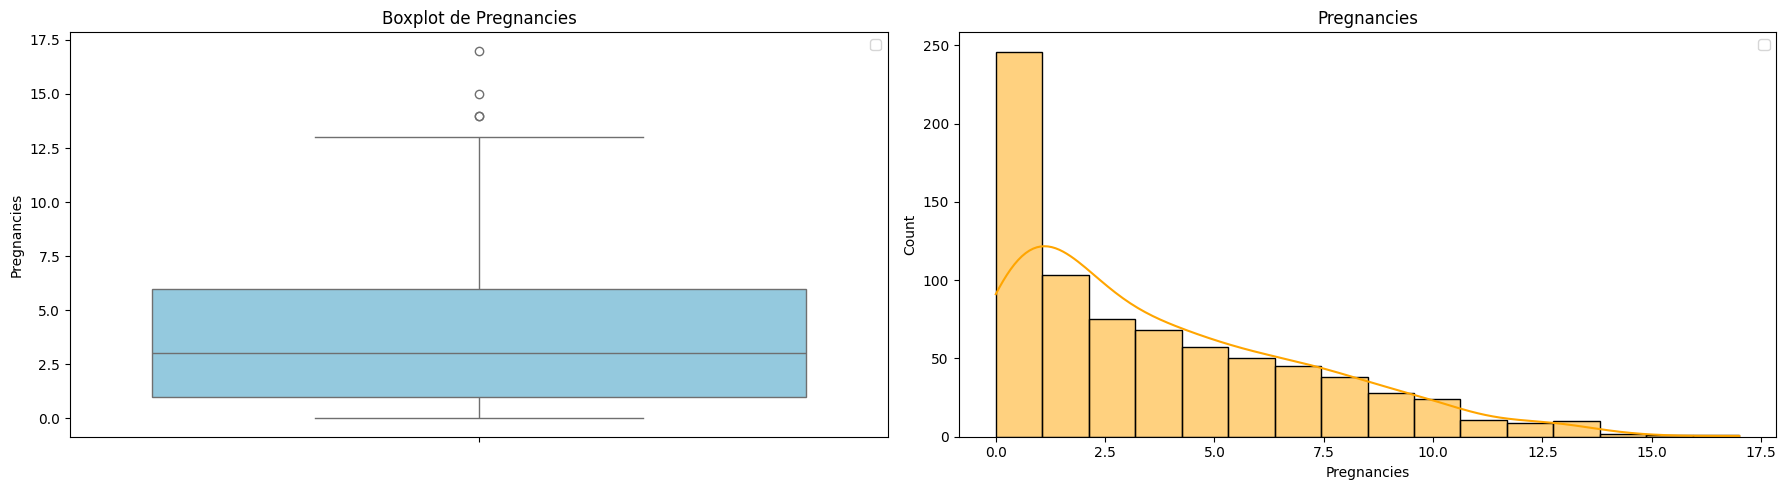

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


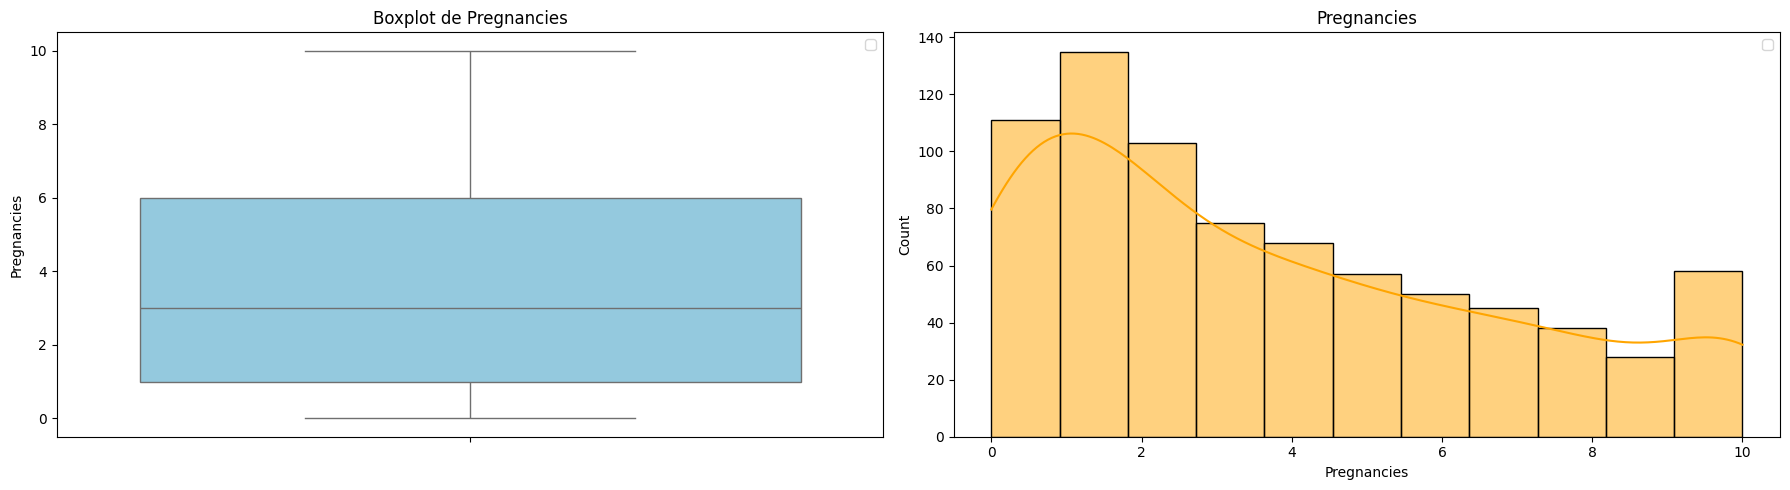

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


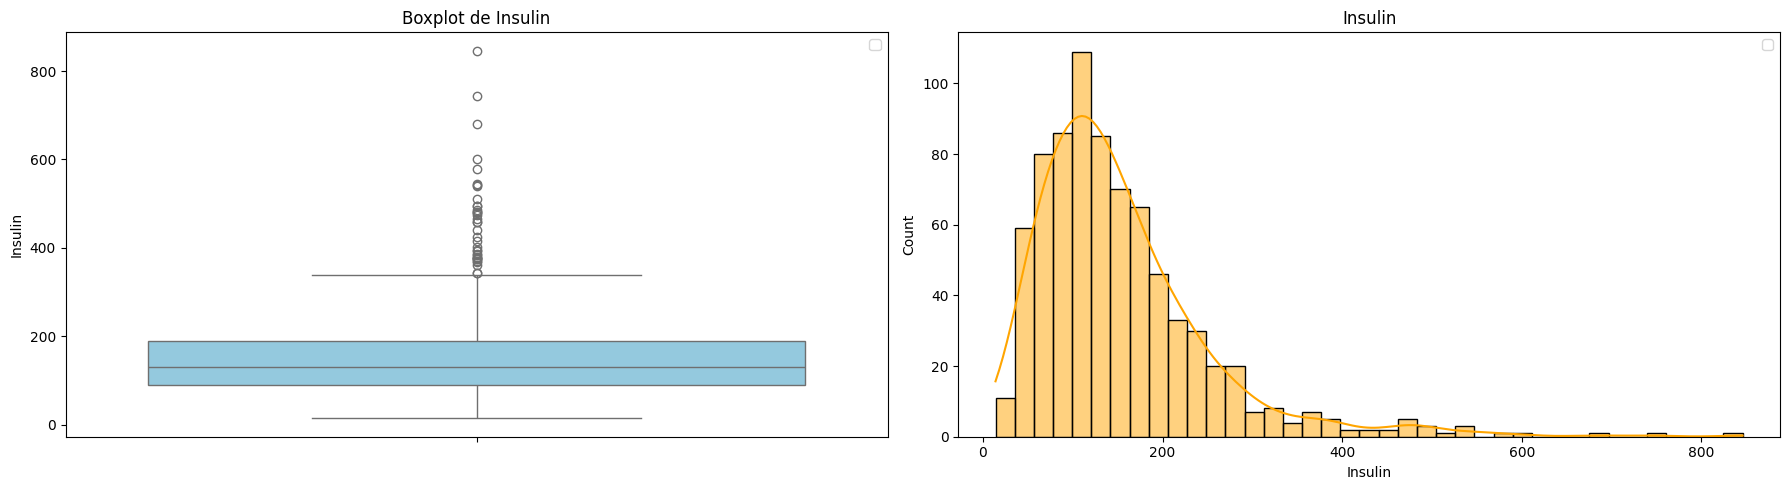

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


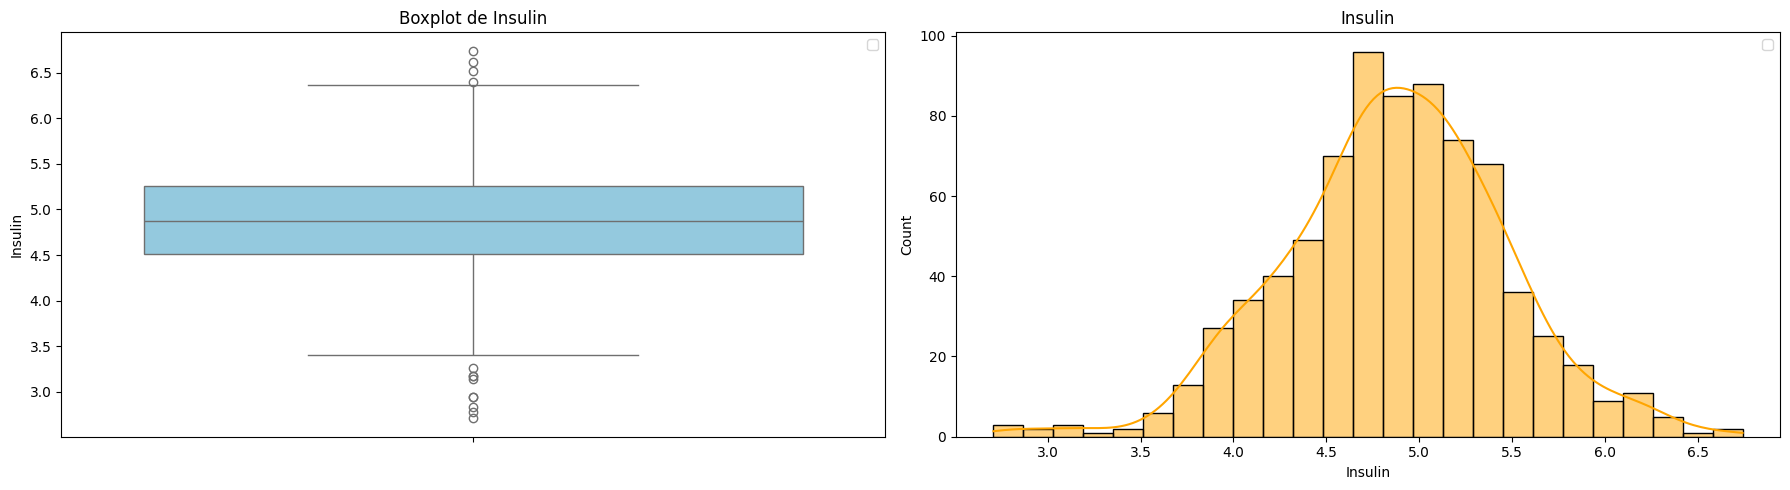

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


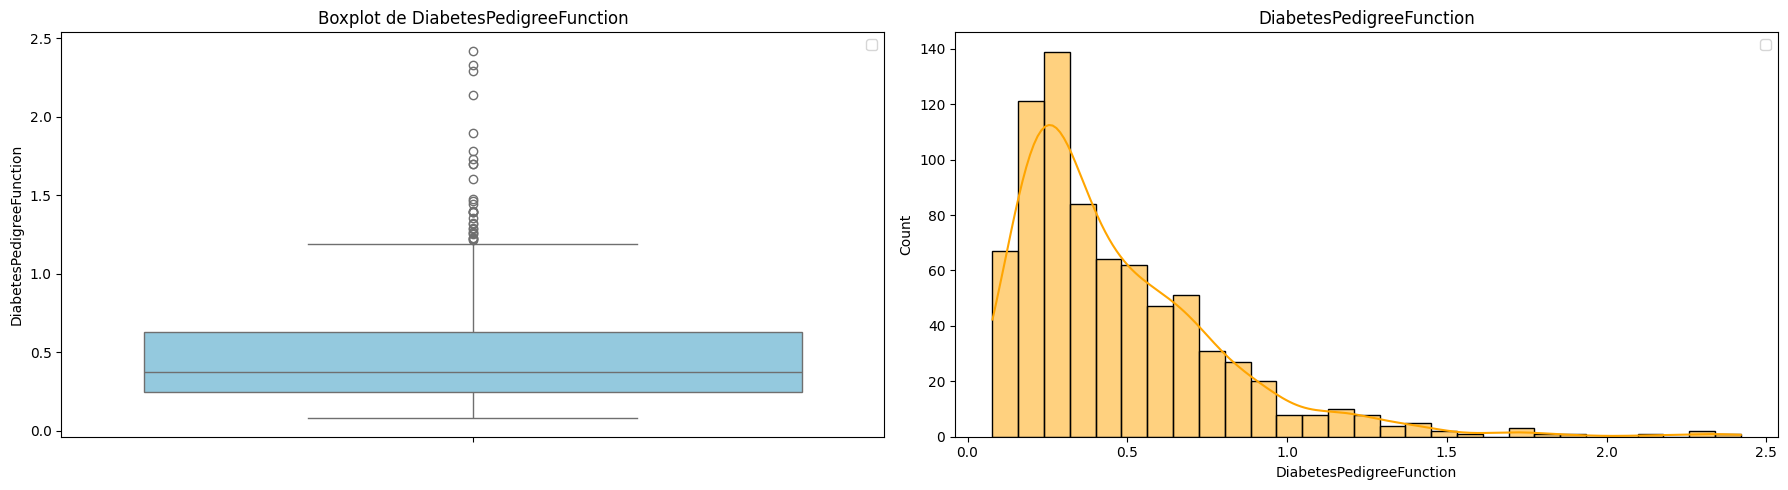

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


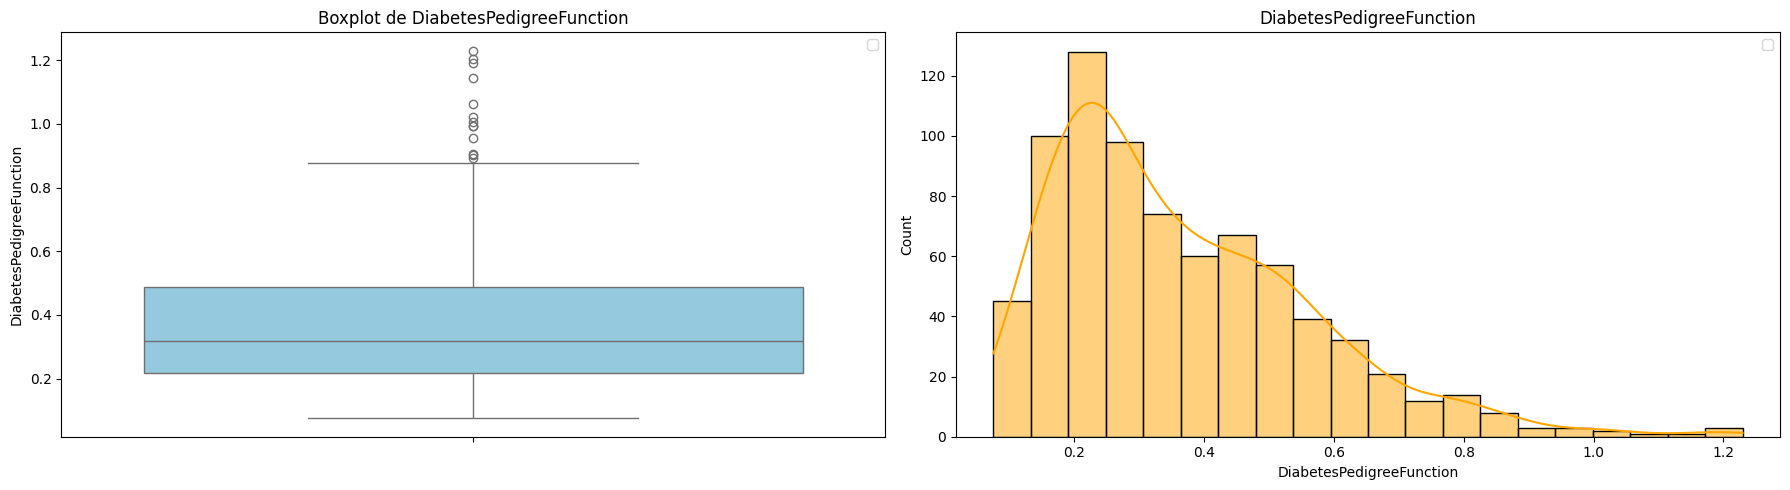

In [388]:

def preparation_finale_model(df):
    df_prepare = df.copy()
    
    # Transformations
    df_prepare['Insulin'] = np.log1p(df['Insulin'])
    df_prepare['DiabetesPedigreeFunction'] = np.log1p(df['DiabetesPedigreeFunction'])
    df_prepare['Pregnancies'] = winsorize(df['Pregnancies'], limits=[0.05, 0.05])
    
    return df_prepare

df_prepare = preparation_finale_model(dataset_2)

columns_problems = ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction']

for col in columns_problems:
    visualization(dataset_2, col)
    visualization(df_prepare, col)

#### *️⃣ Appliquer le z-score sur toutes les colonnes : 

In [389]:

df_prepare_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

total_outliers = 0

dataset_3 = df_prepare

# for col in df_prepare_columns:
#     dataset_3, n_outliers, outliers, inf_limit, sup_limit  = detect_remote_outliers_z_score(dataset_3, col)
#     total_outliers = total_outliers + n_outliers
    
# print("Nombre total des outliers : ", total_outliers)
# print("Dataset Shape : ", dataset_3.shape)

### 4️⃣ Étudier les relations entre les variables.

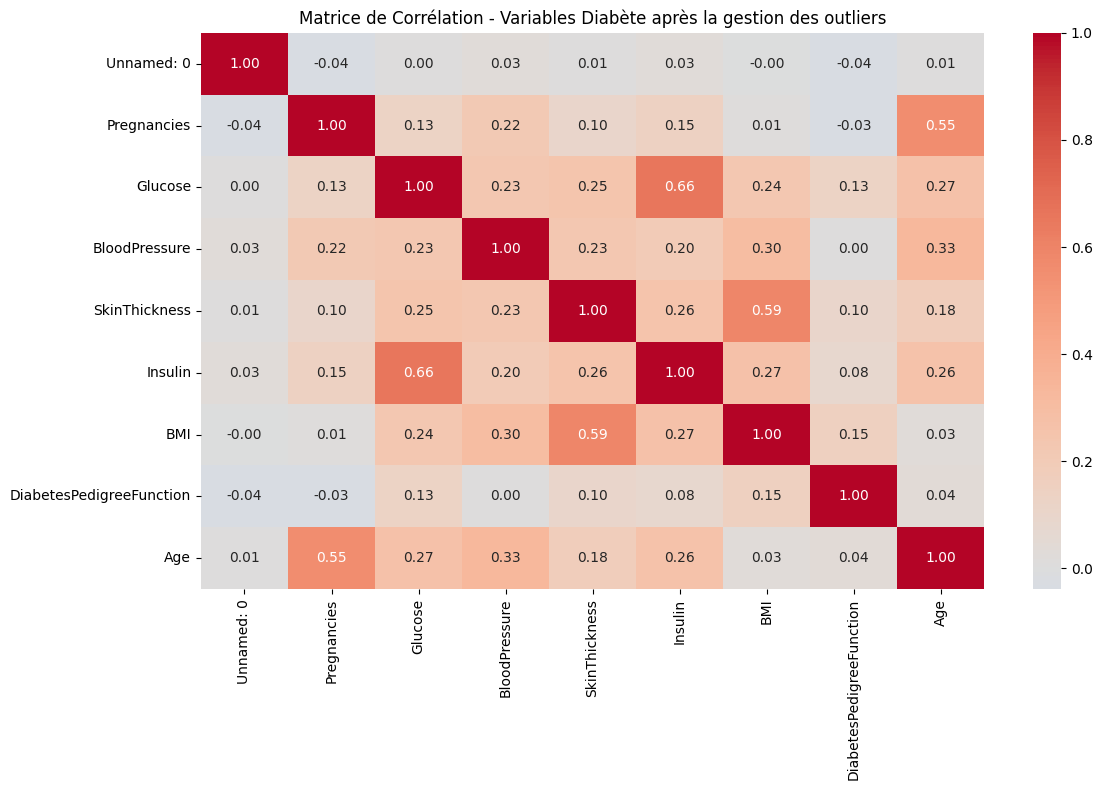

In [390]:
plt.figure(figsize=(12, 8))
sbn.heatmap(dataset_3.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation - Variables Diabète après la gestion des outliers')
plt.tight_layout()
plt.show()

<table style="border-collapse:collapse; width:100%; max-width:900px; font-family:Arial, sans-serif;">
  <thead>
    <tr style="background:#f2f2f2;">
      <th style="border:1px solid #ddd; padding:8px; text-align:left;">Variables corrélées</th>
      <th style="border:1px solid #ddd; padding:8px; text-align:center;">Coefficient r</th>
      <th style="border:1px solid #ddd; padding:8px; text-align:center;">Type de relation</th>
      <th style="border:1px solid #ddd; padding:8px; text-align:left;">Interprétation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Glucose – Insulin</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.67</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Forte (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une glycémie élevée est souvent associée à une sécrétion plus forte d’insuline.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>SkinThickness – BMI</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.60</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Forte (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une épaisseur cutanée importante est généralement observée chez les personnes avec un IMC élevé.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Pregnancies – Age</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.57</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Modérée à forte (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Plus la femme est âgée, plus le nombre de grossesses est élevé.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>BloodPressure – BMI</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.31</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Modérée (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une tension artérielle légèrement corrélée à l’IMC (poids).</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Glucose – BloodPressure</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.22</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Faible (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une légère relation entre la glycémie et la pression artérielle.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Autres relations</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">&lt; 0.2</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Faible</td>
      <td style="border:1px solid #ddd; padding:8px;">Peu de dépendance entre ces variables.</td>
    </tr>
  </tbody>
</table>


Conclusion : 

* Les corrélations fortes (r > 0.5) indiquent des relations physiologiques cohérentes.
* Aucune corrélation excessive (> 0.8), donc pas de multicolinéarité importante.
* Les variables peuvent être conservées ensemble pour la modélisation.

### 5️⃣ Sélectionner les variables présentant la plus grande variabilité.

L’analyse de la variance et de la corrélation montre que les variables les plus informatives sont :

 ➕ Glucose → corrélé à Insulin et BloodPressure → indicateur clé du diabète.

 ➕ Insulin → forte variabilité et lien métabolique direct.

 ➕ BMI → relié à SkinThickness, indicateur d’obésité.

 ➕ Age → impacte le nombre de grossesses et le risque de diabète.

 ➕ Pregnancies → spécifique aux femmes, utile pour le modèle.

🔹 Ces cinq variables présentent une forte variabilité et une corrélation pertinente avec d’autres facteurs → elles seront prioritaires pour l’entraînement du modèle.

### 6️⃣ Visualiser les relations entre les variables via des outils graphiques comme le pairplot.

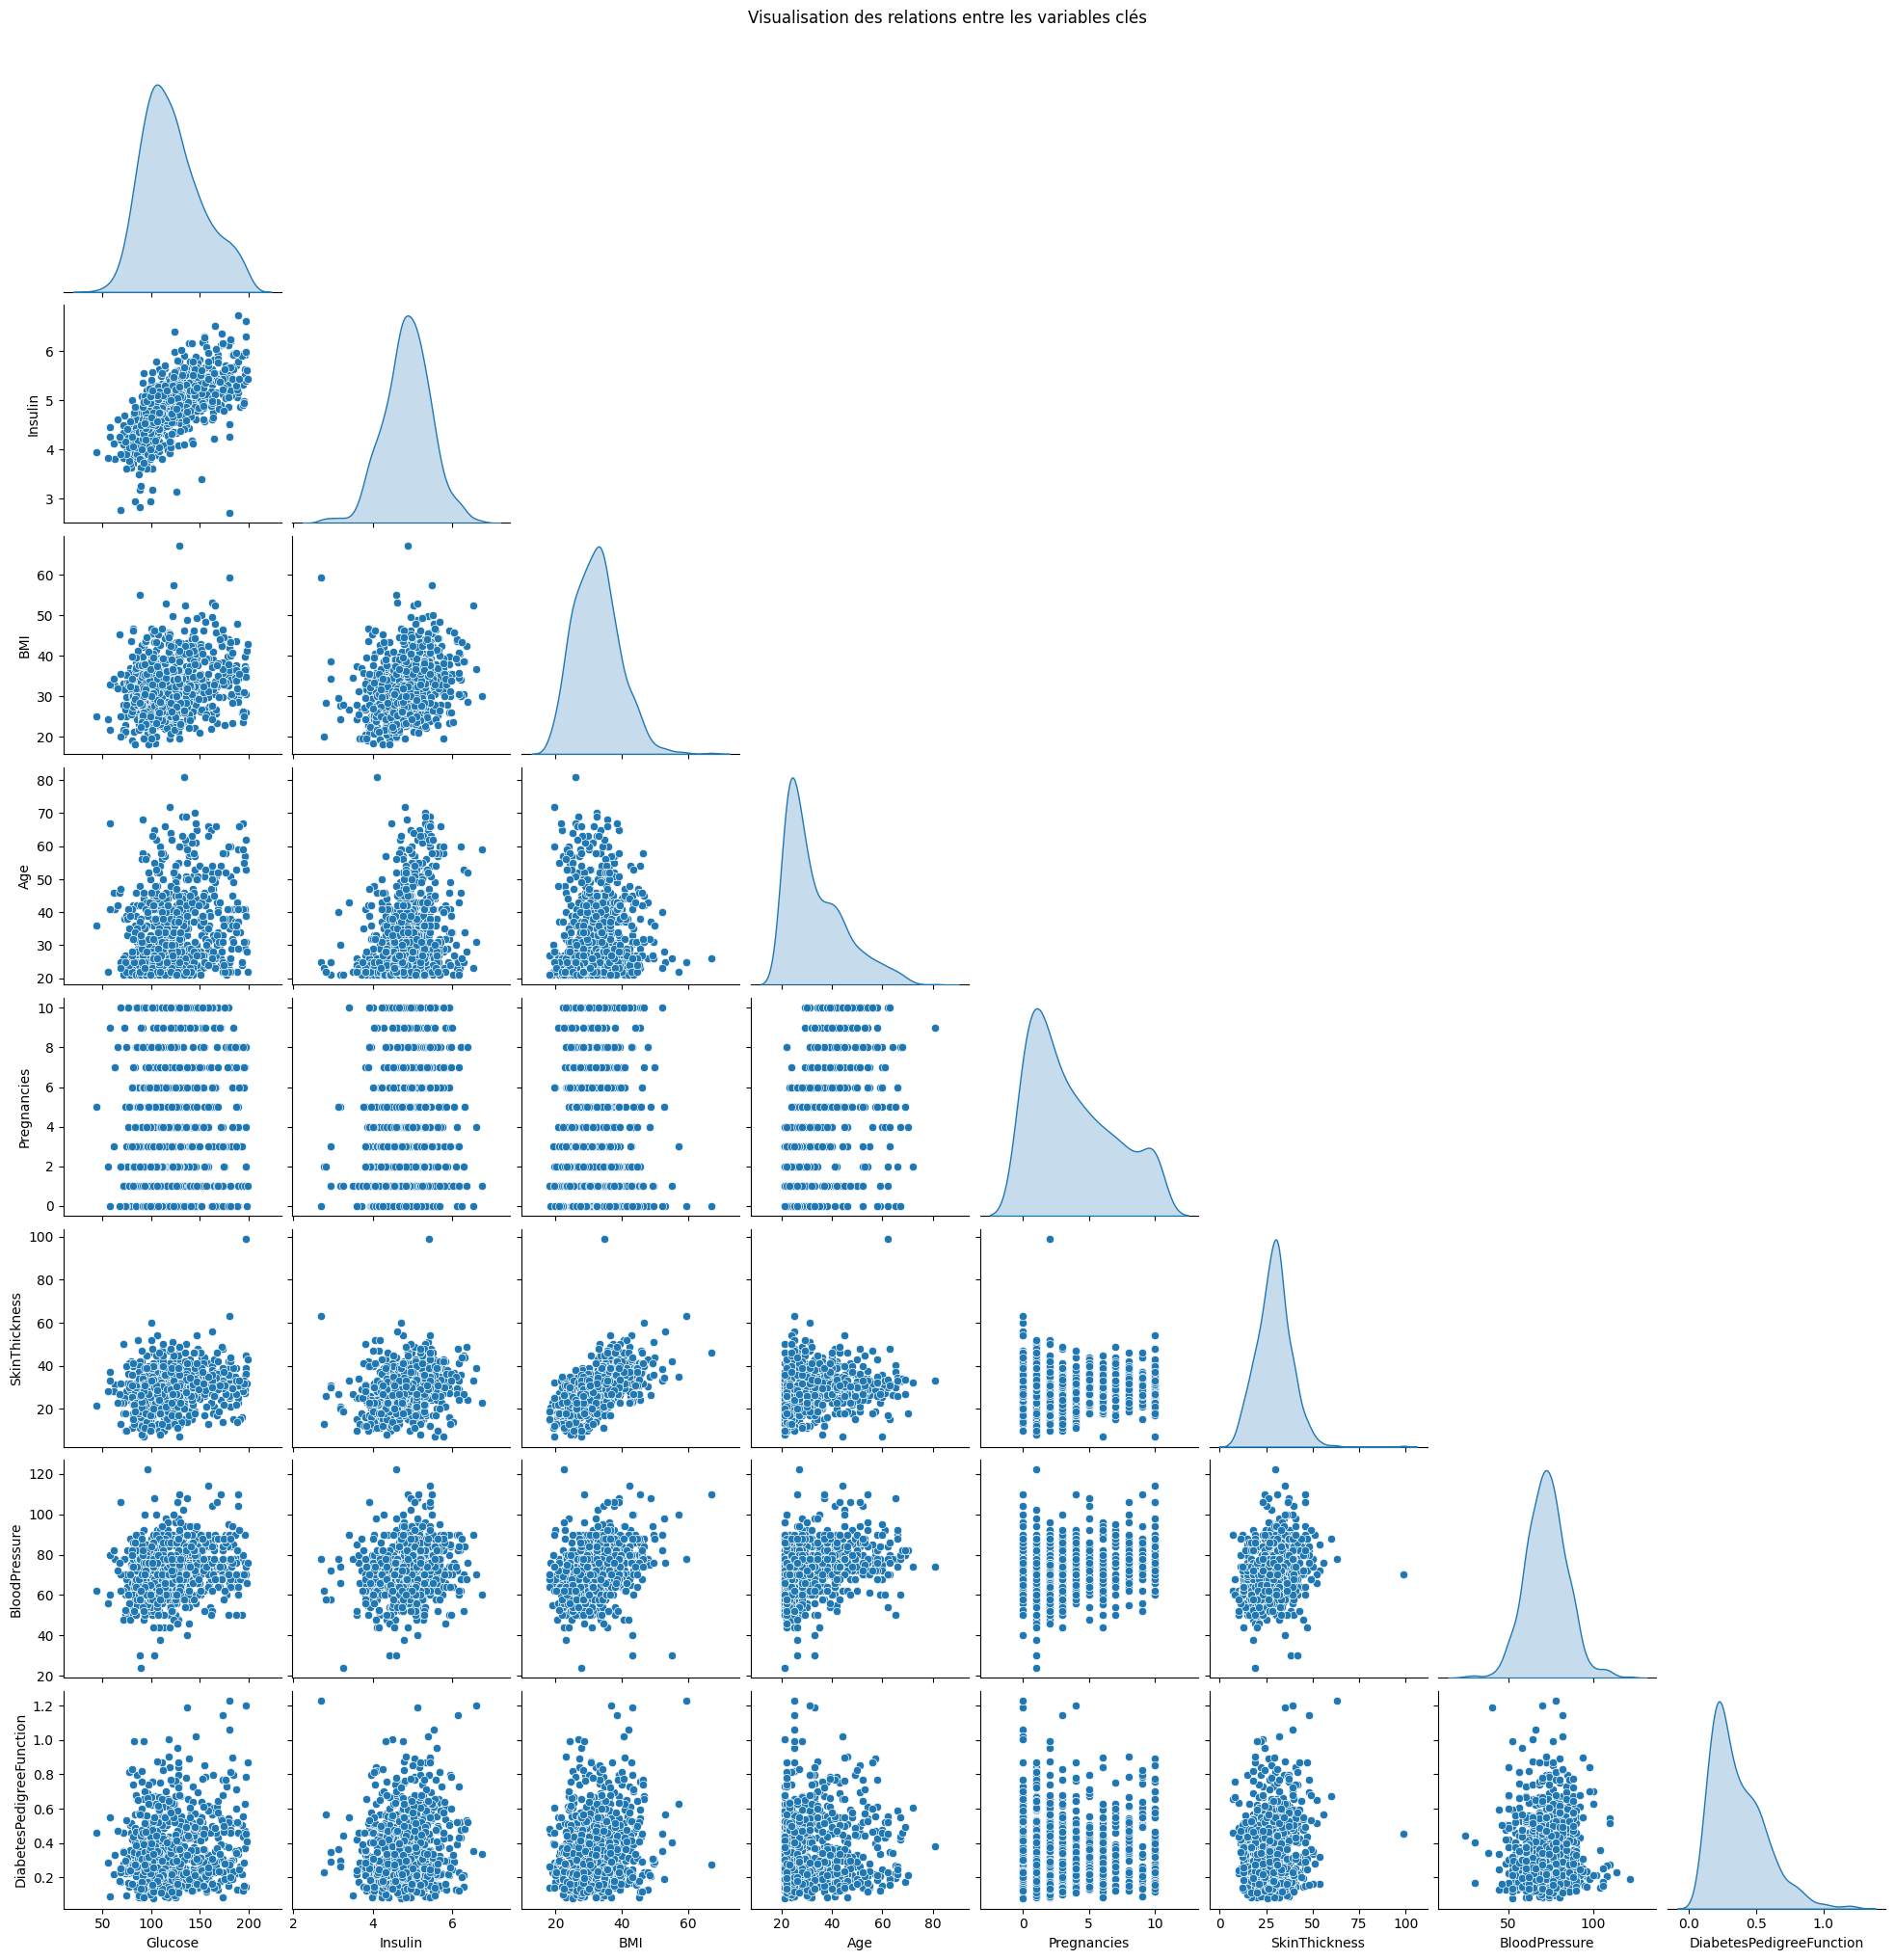

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables les plus pertinentes
vars_selected = ['Glucose', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'BloodPressure', 'DiabetesPedigreeFunction']

# Pairplot
sns.pairplot(dataset_3[vars_selected], diag_kind='kde', corner=True)
plt.suptitle("Visualisation des relations entre les variables clés", y=1.02)
plt.show()


*  Variables conservées :

In [392]:
X = dataset_3[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'DiabetesPedigreeFunction']]
print("Colonnes : ",X.columns)
print("Shape : ",X.shape)


Colonnes :  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'DiabetesPedigreeFunction'],
      dtype='object')
Shape :  (768, 8)


### 7️⃣ Appliquer la technique appropriée pour normaliser ou standardiser les échelles des variables numériques.

In [393]:
def standard_data(data):
    standar_scaler = StandardScaler()
    
    standard_dataset = standar_scaler.fit_transform(data)
    
    df_standard = pd.DataFrame(standard_dataset, columns=X.columns)
    # X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    return df_standard

In [394]:
dataset_4 = standard_data(X)
dataset_4.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction
0,0.723226,0.866352,-0.030668,0.632572,0.339742,0.170302,1.425995,0.612059
1,-0.878382,-1.202079,-0.523065,-0.022166,-0.522583,-0.845411,-0.190672,-0.324994
2,1.363869,2.015481,-0.687197,0.043308,1.790561,-1.324247,-0.105584,0.749586


## 🎯 Entraînement des modèles de clustering avec K-Means

In [395]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 1️⃣ Déterminer la valeur optimale de k via la méthode du coude et silhouette.

coude pour k = 2 ----> 4799.355761793842
silhouette pour k = 2 ----> 0.199188374083645
coude pour k = 3 ----> 4162.526689766264
silhouette pour k = 3 ----> 0.19293071031340966
coude pour k = 4 ----> 3872.280983565239
silhouette pour k = 4 ----> 0.1493110124684279
coude pour k = 5 ----> 3614.7559768200776
silhouette pour k = 5 ----> 0.13590352166677683
coude pour k = 6 ----> 3404.504470500292
silhouette pour k = 6 ----> 0.13510452839608886
coude pour k = 7 ----> 3244.924976272071
silhouette pour k = 7 ----> 0.13724366777802477
coude pour k = 8 ----> 3099.1605682716427
silhouette pour k = 8 ----> 0.14378097958277536
coude pour k = 9 ----> 2992.666069173727
silhouette pour k = 9 ----> 0.14028863966971564
coude pour k = 10 ----> 2891.7360282802133
silhouette pour k = 10 ----> 0.1347120004073022


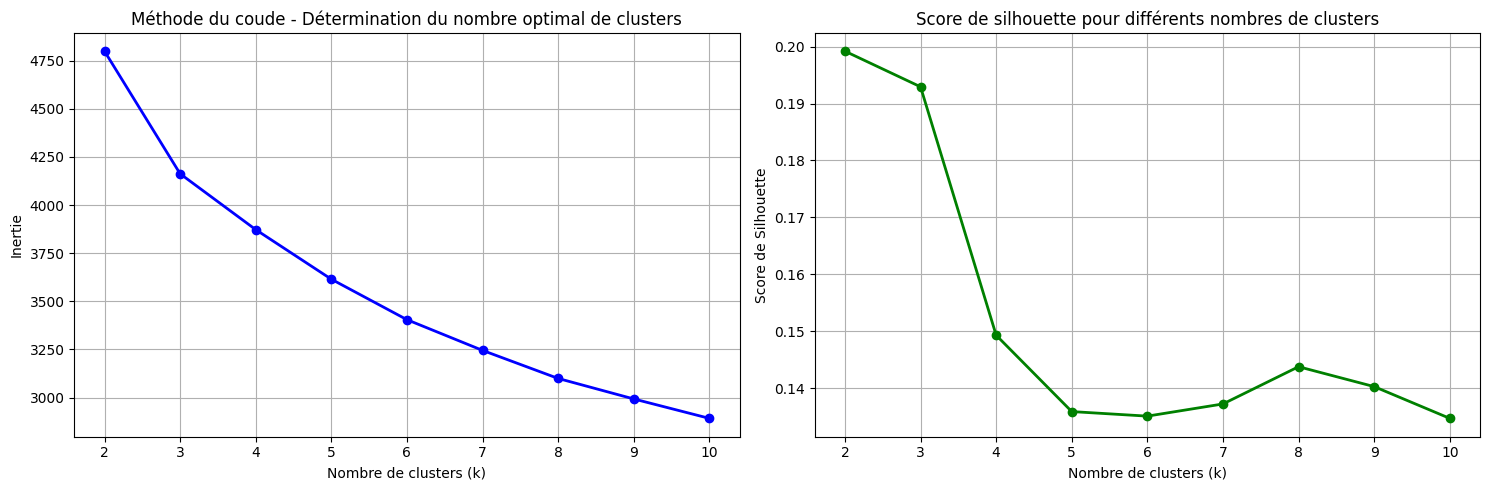

In [396]:

inertias = []
silhouette_scores = []

K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13, n_init=10)
    kmeans.fit(dataset_4)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(dataset_4, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"coude pour k = {k} ----> {kmeans.inertia_}")
    print(f"silhouette pour k = {k} ----> {score}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# diagramme de la méthode du coude
ax1.plot(K, inertias, 'o-', linewidth=2, color='blue')
ax1.set_xlabel('Nombre de clusters (k)')
ax1.set_ylabel('Inertie')
ax1.set_title('Méthode du coude - Détermination du nombre optimal de clusters')
ax1.grid(True)

# diagramme du score de silhouette
ax2.plot(K, silhouette_scores, 'o-', linewidth=2, color='green')
ax2.set_xlabel('Nombre de clusters (k)')
ax2.set_ylabel('Score de Silhouette')
ax2.set_title('Score de silhouette pour différents nombres de clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()


⌛ Analyse de vos résultats : 

***** Méthode du coude :
* Coude très net à k = 3 ( la courbe change clairement de pente )

* Après k=3, la décroissance est plus linéaire

***** Score de Silhouette :
* Meilleur score : k = 2 

* Bon score : k = 3

* score optimal : k = 4


In [397]:
# Alors, j'ai choisi le optimal_k = 3 
optimal_k = 2

### 2️⃣ Entraîner un modèle K-Means avec le nombre de clusters choisi.

* Entraîner le model : 

In [398]:
kmeans_final = KMeans(n_clusters=optimal_k, random_state=13, n_init=10)
kmeans_final.fit(dataset_4)



,n_clusters,2
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,13
,copy_x,True
,algorithm,'lloyd'


* Ajouter la colonne "Cluster" à le dataframe "dataset_4"

In [399]:
dataset_4['Cluster'] = kmeans_final.labels_

dataset_4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction,Cluster
0,0.723226,0.866352,-0.030668,0.632572,0.339742,0.170302,1.425995,0.612059,1
1,-0.878382,-1.202079,-0.523065,-0.022166,-0.522583,-0.845411,-0.190672,-0.324994,0
2,1.363869,2.015481,-0.687197,0.043308,1.790561,-1.324247,-0.105584,0.749586,1
3,-0.878382,-1.070750,-0.523065,-0.676903,-0.529659,-0.627758,-1.041549,-1.063014,0
4,-1.198703,0.505198,-2.656784,0.632572,0.440337,1.548769,-0.020496,4.158488,0
...,...,...,...,...,...,...,...,...,...
763,2.004512,-0.676763,0.297597,2.051171,0.555854,0.068731,2.532136,-1.045766,1
764,-0.558060,0.012714,-0.194800,-0.240412,-0.323065,0.634628,-0.531023,-0.366205,0
765,0.402904,-0.020118,-0.030668,-0.676903,-0.237474,-0.903452,-0.275760,-0.736877,0
766,-0.878382,0.144043,-1.015461,0.130607,-0.051430,-0.337554,1.170732,-0.332462,0


### 3️⃣ Visualiser la répartition des observations par cluster et interpréter les résultats.

In [400]:
print(f"Le distribution de dataset par rapport a Cluster : ")

dataset_4['Cluster'].value_counts()

Le distribution de dataset par rapport a Cluster : 


Cluster
1    390
0    378
Name: count, dtype: int64

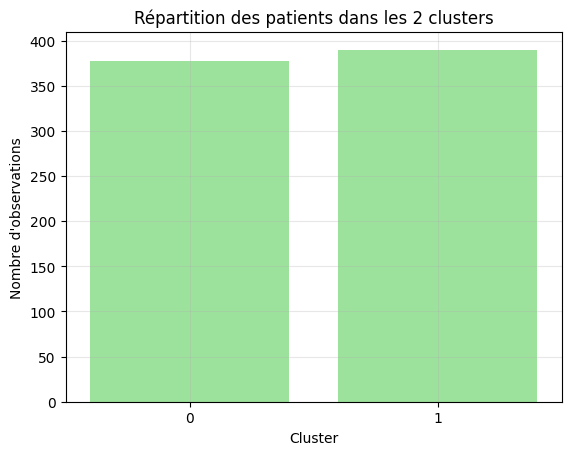

In [401]:
sbn.countplot(data=dataset_4, x='Cluster', color='lightgreen')
plt.title(f'Répartition des patients dans les {optimal_k} clusters')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'observations')
plt.xticks(range(optimal_k))
plt.grid(True, alpha=0.3)
plt.show()

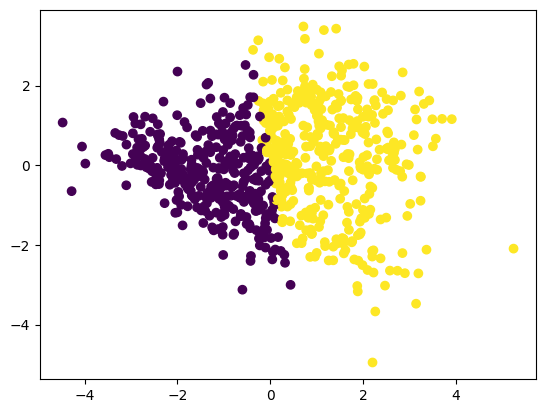

In [402]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset_4.drop('Cluster', axis=1))
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=dataset_4['Cluster'])

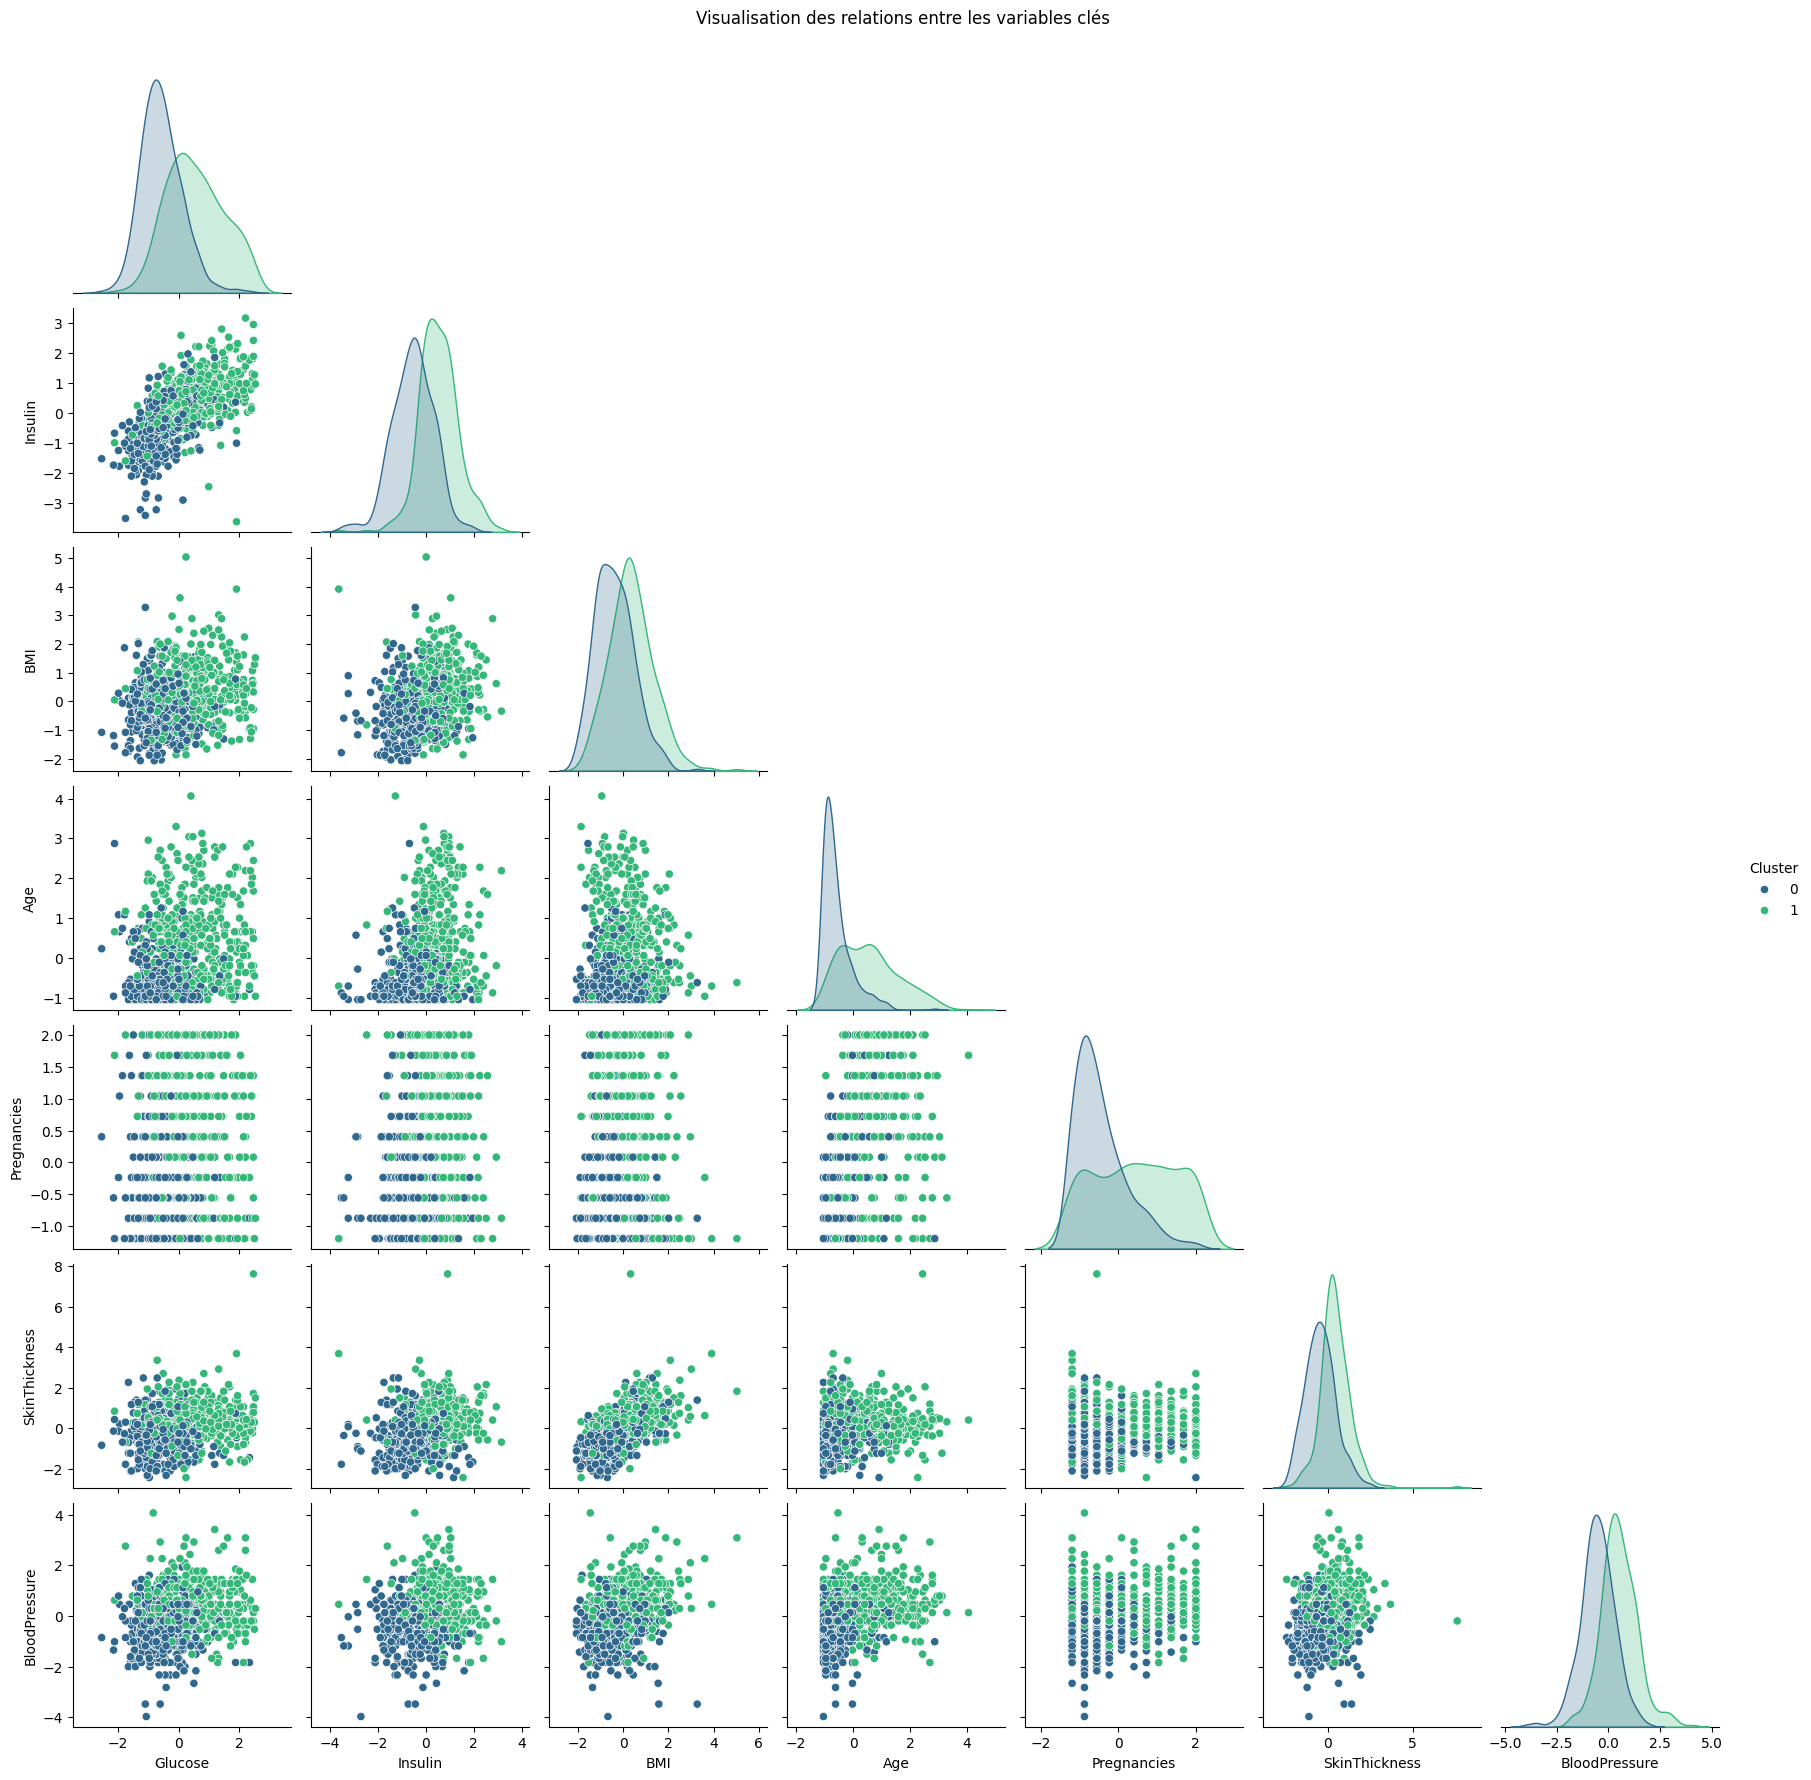

In [403]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables les plus pertinentes
vars_selected = ['Glucose', 'Insulin', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'BloodPressure', 'Cluster']

# Pairplot 
sns.pairplot(dataset_4[vars_selected], diag_kind='kde', hue='Cluster', corner=True, palette='viridis')
plt.suptitle("Visualisation des relations entre les variables clés", y=1.02)
plt.show()

In [404]:
Clusters = sorted(dataset_4['Cluster'].unique())

Clusters

[np.int32(0), np.int32(1)]

In [405]:
for cluster in Clusters:
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster} - {len(dataset_4[dataset_4['Cluster'] == cluster])} patients")
    print(f"{'='*50}")
    cluster_data = dataset_4[dataset_4['Cluster'] == cluster]
    print(cluster_data.describe())


CLUSTER 0 - 378 patients
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   378.000000  378.000000     378.000000     378.000000  378.000000   
mean     -0.459760   -0.573663      -0.530055      -0.442664   -0.548191   
std       0.672641    0.680540       0.827979       0.893243    0.862739   
min      -1.198703   -2.548201      -3.969842      -2.422871   -3.529273   
25%      -0.878382   -1.037918      -1.015461      -1.113395   -1.111433   
50%      -0.558060   -0.657064      -0.523065      -0.458657   -0.519061   
75%      -0.237739   -0.184280      -0.030668       0.086957    0.017202   
max       2.004512    2.343803       1.938919       2.487662    1.957224   

              BMI         Age  DiabetesPedigreeFunction  Cluster  
count  378.000000  378.000000                378.000000    378.0  
mean    -0.383572   -0.580095                 -0.070180      0.0  
std      0.854991    0.522062                  0.945525      0.0  
min     -2.064266   -

## 🎯 Analyse des clusters : 

### 1️⃣ Calculer les moyennes des variables dans chaque groupe.

In [406]:
dataset_3['Cluster'] = dataset_4['Cluster']

In [407]:
# 1. Calculer les moyennes des caractéristiques par cluster
moyennes_par_cluster = dataset_3.groupby("Cluster").mean()
print(f"\nMoyennes par cluster :")
pd.DataFrame(moyennes_par_cluster)


Moyennes par cluster :


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Cluster,,,,,,,,,
0,389.748677,2.306878,104.140212,65.914815,25.146561,4.542872,29.782857,0.351395,26.423280
1,377.443590,5.133333,138.547692,78.633846,33.134872,5.183930,34.988462,0.378811,39.848718


### 2️⃣ Compter le nombre d’observations par groupe.

In [408]:
# 2. Compter le nombre d'observations par cluster
count_par_cluster = dataset_3.groupby("Cluster").size()

print(f"\nNombre d'observations par cluster :")
print(count_par_cluster)




Nombre d'observations par cluster :
Cluster
0    378
1    390
dtype: int64


### 3️⃣ Le cluster dont les moyennes des variables Glucose (>126), BMI (>30) et Diabetes Pedigree Function (>0,5) dépassent les seuils critiques peut être interprété comme à haut risque de diabète.  &  Ajouter une colonne risk_category basée sur le numero de cluster (ex. : si 1 => risque élevé et 0 => faible).

In [409]:


print("dataset_4.columns : ", dataset_4.columns)
print("dataset_4.shape", dataset_4.shape)
print("dataset_4.head", dataset_4.head(2))
print("dataset_3.columns : ", dataset_3.columns)
print("dataset_3.shape", dataset_3.shape)
print("dataset_3.head", dataset_3.head(2))

dataset_4.columns :  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'DiabetesPedigreeFunction', 'Cluster'],
      dtype='object')
dataset_4.shape (768, 9)
dataset_4.head    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.723226  0.866352      -0.030668       0.632572  0.339742  0.170302   
1    -0.878382 -1.202079      -0.523065      -0.022166 -0.522583 -0.845411   

        Age  DiabetesPedigreeFunction  Cluster  
0  1.425995                  0.612059        1  
1 -0.190672                 -0.324994        0  
dataset_3.columns :  Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Cluster'],
      dtype='object')
dataset_3.shape (768, 10)
dataset_3.head    Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin  \
0         0.0          6.0    148.0           72.0           35.0  5.0701

In [410]:
dataset_3.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.0,6.0,148.0,72.0,35.0,5.070161,33.60,0.486738,50.0,1
1,1.0,1.0,85.0,66.0,29.0,4.558079,26.60,0.300845,31.0,0
2,2.0,8.0,183.0,64.0,29.6,5.931715,23.30,0.514021,32.0,1
3,3.0,1.0,89.0,66.0,23.0,4.553877,28.10,0.154436,21.0,0
4,4.0,0.0,137.0,40.0,35.0,5.129899,43.10,1.190279,33.0,0
5,5.0,5.0,116.0,74.0,35.8,5.043425,25.60,0.183155,30.0,1
6,6.0,3.0,78.0,50.0,32.0,4.488636,31.00,0.221542,26.0,0
7,7.0,10.0,115.0,78.8,38.2,5.029130,35.30,0.125751,29.0,1
8,8.0,2.0,197.0,70.0,45.0,6.298949,30.50,0.146694,53.0,1
9,9.0,8.0,125.0,96.0,34.2,5.125154,36.24,0.208639,54.0,1


c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


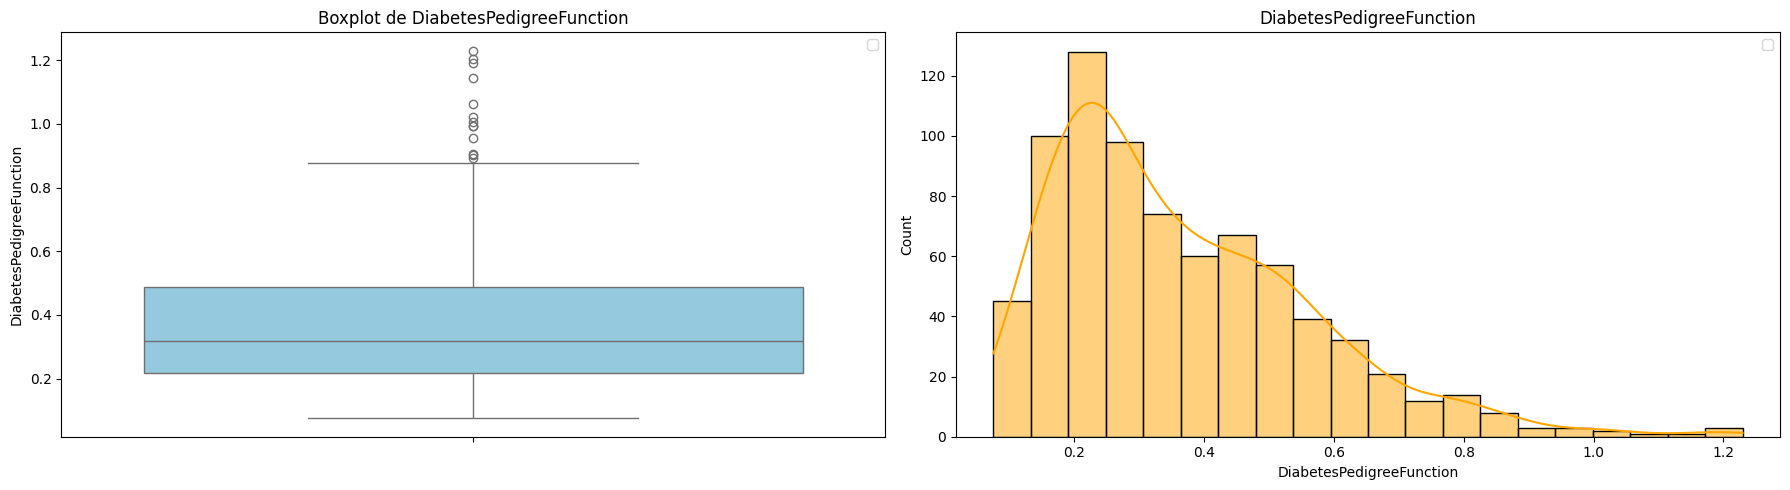

In [411]:
visualization(dataset_3, 'DiabetesPedigreeFunction')

In [412]:
dataset_3['DiabetesPedigreeFunction'] = np.expm1(dataset_3['DiabetesPedigreeFunction'])

In [413]:
dataset_3.head(10)


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.0,6.0,148.0,72.0,35.0,5.070161,33.60,0.627,50.0,1
1,1.0,1.0,85.0,66.0,29.0,4.558079,26.60,0.351,31.0,0
2,2.0,8.0,183.0,64.0,29.6,5.931715,23.30,0.672,32.0,1
3,3.0,1.0,89.0,66.0,23.0,4.553877,28.10,0.167,21.0,0
4,4.0,0.0,137.0,40.0,35.0,5.129899,43.10,2.288,33.0,0
5,5.0,5.0,116.0,74.0,35.8,5.043425,25.60,0.201,30.0,1
6,6.0,3.0,78.0,50.0,32.0,4.488636,31.00,0.248,26.0,0
7,7.0,10.0,115.0,78.8,38.2,5.029130,35.30,0.134,29.0,1
8,8.0,2.0,197.0,70.0,45.0,6.298949,30.50,0.158,53.0,1
9,9.0,8.0,125.0,96.0,34.2,5.125154,36.24,0.232,54.0,1


c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


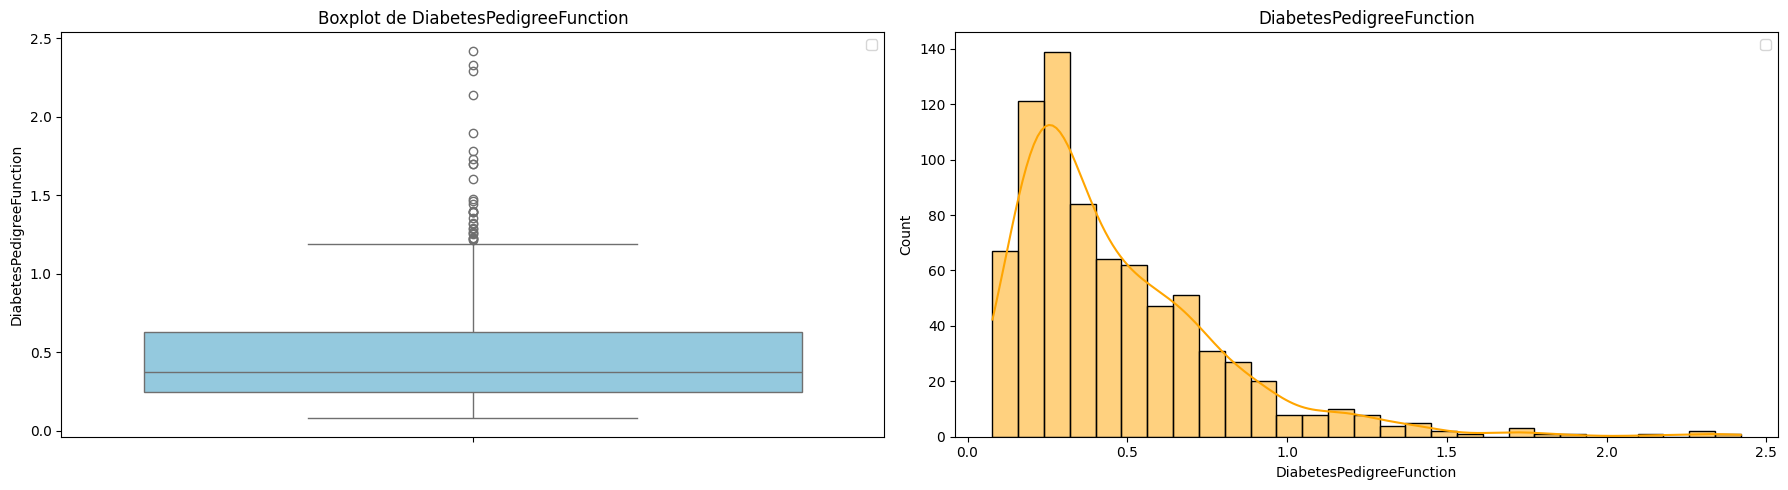

In [414]:
visualization(dataset_3, 'DiabetesPedigreeFunction')

In [415]:
def analyser_clusters(data, col="Cluster"):
    # moyenne
    print("************************************ Moyenne *****************************************************")
    moyennes_par_cluster = data.groupby(col).mean()
    print("Moyennes colonnes par clusters : \n", moyennes_par_cluster)
    
    # nombre d'observation 
    print("************************************ observation *****************************************************")
    count_par_cluster = data.groupby(col).size()
    print("nombre d'observation des clusters : \n", count_par_cluster)
    
    # cluster à haut risque
    clusters_haut_risque = []
    
    for cluster in moyennes_par_cluster.index:
        glucose_ok = moyennes_par_cluster.loc[cluster, 'Glucose'] > 126
        bmi_ok = moyennes_par_cluster.loc[cluster, 'BMI'] > 30
        dpf_ok = moyennes_par_cluster.loc[cluster, 'DiabetesPedigreeFunction'] > 0.49
        print("\n ", cluster)
        print(glucose_ok)
        print(bmi_ok)
        print(dpf_ok, moyennes_par_cluster.loc[cluster, 'DiabetesPedigreeFunction'])
        
        if glucose_ok and bmi_ok and dpf_ok:
            clusters_haut_risque.append(cluster)
            
    data['risk_category'] = data[col].apply(
        lambda x: 1 if x in clusters_haut_risque else 0
    )
    
    print(f"\n=== RÉSULTATS FINAUX ===")
    print(f"Clusters à haut risque: {clusters_haut_risque}")
    print(f"Répartition des catégories de risque:")
    print(data['risk_category'].value_counts())
    
    return data, moyennes_par_cluster, count_par_cluster
    
    
# ! **************************************************************************************************************************
dataset_5, moyennes_par_cluster, count_par_cluster = analyser_clusters(dataset_3, 'Cluster')

************************************ Moyenne *****************************************************
Moyennes colonnes par clusters : 
          Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
Cluster                                                                      
0        389.748677     2.306878  104.140212      65.914815      25.146561   
1        377.443590     5.133333  138.547692      78.633846      33.134872   

          Insulin        BMI  DiabetesPedigreeFunction        Age  
Cluster                                                            
0        4.542872  29.782857                  0.448042  26.423280  
1        5.183930  34.988462                  0.494977  39.848718  
************************************ observation *****************************************************
nombre d'observation des clusters : 
 Cluster
0    378
1    390
dtype: int64

  0
False
False
False 0.448042328042328

  1
True
True
True 0.4949769230769231

=== RÉSULTATS FINAUX

In [416]:
dataset_5['Cluster'].value_counts()

Cluster
1    390
0    378
Name: count, dtype: int64

In [417]:
dataset_5['risk_category'].unique()

array([1, 0])

In [418]:
dataset_5['Cluster'].unique()

array([1, 0], dtype=int32)

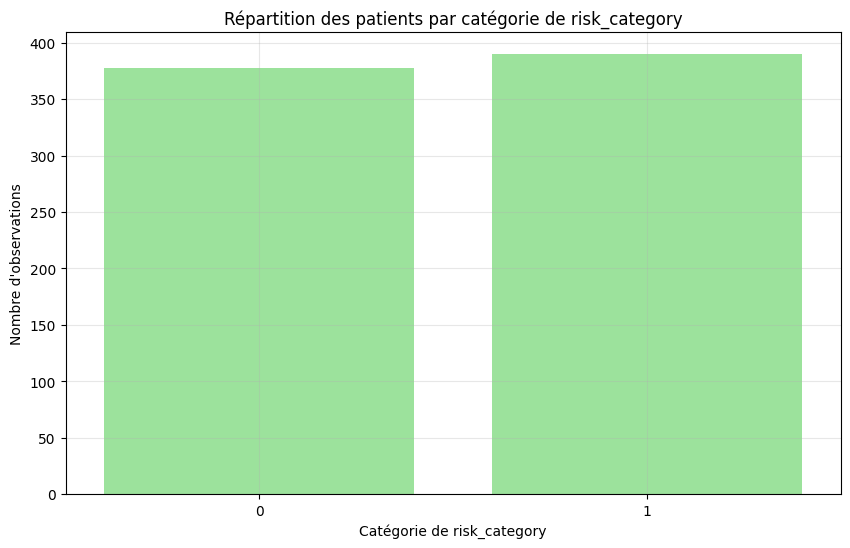

Répartition des risques:
risk_category
1    390
0    378
Name: count, dtype: int64


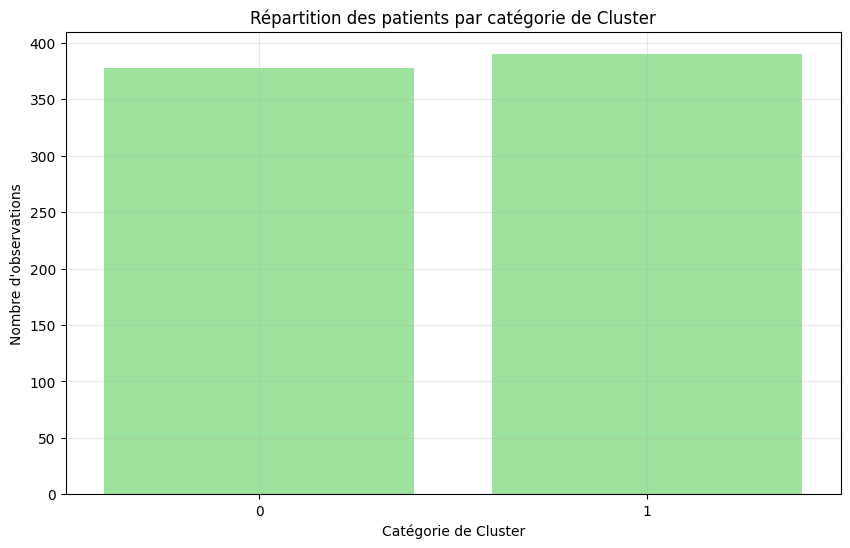

Répartition des risques:
Cluster
1    390
0    378
Name: count, dtype: int64


In [419]:
def visualiser_risk_category(dataset, col):
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataset, x=col, color='lightgreen')
    plt.title(f'Répartition des patients par catégorie de {col}')
    plt.xlabel(f'Catégorie de {col}')
    plt.ylabel("Nombre d'observations")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("Répartition des risques:")
    print(dataset[col].value_counts())

visualiser_risk_category(dataset_5, col="risk_category")
visualiser_risk_category(dataset_5, col="Cluster")

In [420]:
dataset_5.describe()

c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\ramas\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the 

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster,risk_category
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.742188,121.612760,72.373698,29.203125,4.868409,32.426328,0.471876,33.240885,0.507812,0.507812
std,221.846794,3.123898,30.477714,12.193237,9.169946,0.594226,6.896203,0.331329,11.760232,0.500265,0.500265
min,0.000000,0.000000,44.000000,24.000000,7.000000,2.708050,18.200000,0.078000,21.000000,0.000000,0.000000
25%,191.750000,1.000000,99.000000,64.000000,23.000000,4.510860,27.475000,0.243750,24.000000,0.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,29.400000,4.875197,32.290000,0.372500,29.000000,1.000000,1.000000
75%,575.250000,6.000000,140.250000,80.000000,34.400000,5.252273,36.600000,0.626250,41.000000,1.000000,1.000000
max,767.000000,10.000000,199.000000,122.000000,99.000000,6.741701,67.100000,2.420000,81.000000,1.000000,1.000000


## 🎯 Classification supervisée et évaluation des modèles

### 1️⃣ Définir la variable cible y à partir de la colonne Cluster.

In [421]:
from sklearn.model_selection import train_test_split


def diviser_test_train(data, target="risk_category"):
    X = data.drop(target, axis=1)
    y = data[target]
    
    print("\n\nTarget y : \n",y.shape, "\n", y.head())
    print("\n\nFeature X : \n",X.shape,  "\n", X.head() )
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y, 
        test_size=0.2,
        random_state=42,
        shuffle=True,
        stratify=None
    )
    
    print(f"X_train: {X_train.shape} ({X_train.shape[0]/len(data)*100:.1f}%)")
    print(f"X_test: {X_test.shape} ({X_test.shape[0]/len(data)*100:.1f}%)")
    print(f"y_train: {y_train.shape} ({y_train.shape[0]/len(data)*100:.1f}%)")
    print(f"y_test: {y_test.shape} ({y_test.shape[0]/len(data)*100:.1f}%)")
    
    return X_train, X_test, y_train, y_test, X, y

print(dataset_5.columns)
data_entrainement = dataset_5.drop('Cluster', axis=1)
print(data_entrainement.columns)
    
X_train, X_test, y_train, y_test, X, y = diviser_test_train(data_entrainement)

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Cluster', 'risk_category'],
      dtype='object')
Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'risk_category'],
      dtype='object')


Target y : 
 (768,) 
 0    1
1    0
2    1
3    0
4    0
Name: risk_category, dtype: int64


Feature X : 
 (768, 9) 
    Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin  \
0         0.0          6.0    148.0           72.0           35.0  5.070161   
1         1.0          1.0     85.0           66.0           29.0  4.558079   
2         2.0          8.0    183.0           64.0           29.6  5.931715   
3         3.0          1.0     89.0           66.0           23.0  4.553877   
4         4.0          0.0    137.0           40.0           35.0  5.129899   

    BMI  DiabetesP

In [422]:
X_train.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.328990,3.651466,121.753420,72.167427,28.817264,4.864114,32.317622,0.469168,32.907166
std,221.929252,3.085358,30.155315,12.192292,8.779594,0.587560,6.953570,0.336847,11.503437
min,0.000000,0.000000,44.000000,24.000000,8.000000,2.708050,18.200000,0.078000,21.000000
25%,188.250000,1.000000,100.000000,64.000000,23.000000,4.521789,27.225000,0.241500,24.000000
50%,386.500000,3.000000,118.000000,72.000000,29.000000,4.875197,32.000000,0.372500,29.000000
75%,575.750000,6.000000,139.000000,80.000000,34.000000,5.250701,36.375000,0.613750,40.000000
max,767.000000,10.000000,199.000000,122.000000,63.000000,6.741701,67.100000,2.420000,81.000000


In [423]:
# Standarisation de dataset

standar_scaler = StandardScaler()
X_train_scaled = standar_scaler.fit_transform(X_train)
X_test_scaled = standar_scaler.transform(X_test)

print("**************** StandardScaler : *****************")
print("\nX_train_scaled : \n",X_train_scaled)
print("\nX_test_scaled : \n",X_test_scaled)

**************** StandardScaler : *****************

X_train_scaled : 
 [[-1.46710826 -0.53569543 -1.25298647 ... -1.0906341  -0.49073479
  -1.03594038]
 [ 1.04925651  1.73493472 -0.32370322 ... -0.59264226  2.41502991
   1.48710085]
 [-0.17735858 -0.86007117  0.57239135 ... -0.52067813  0.54916055
  -0.94893896]
 ...
 [-0.52008926  2.05931046 -0.68877878 ...  1.91170977  1.981245
   0.44308379]
 [ 0.2239971  -1.18444691  0.63876873 ...  1.45113928 -0.78487662
  -0.33992901]
 [-1.27770446 -1.18444691  0.10774972 ... -1.41303345 -0.61552223
  -1.03594038]]

X_test_scaled : 
 [[ 1.27473723  0.76180751 -0.78834485 ...  0.24214175 -0.11637247
   0.87809089]
 [-0.27657009 -0.53569543 -0.32370322 ...  0.48681982 -0.954231
  -1.03594038]
 [ 1.0763142  -0.53569543 -0.45645797 ... -0.21842874 -0.9245197
  -1.03594038]
 ...
 [-0.18637781  1.41055898 -0.88791091 ...  0.64514092  0.04703966
   2.0961108 ]
 [-0.40283929 -0.53569543  0.80471217 ... -0.62142792 -0.39268751
  -0.33992901]
 [ 0.3457566

In [424]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(614, 9)
(154, 9)


### 2️⃣ Gérer le déséquilibre des classes avec des techniques de sur-échantillonnage ou sous-échantillonnage (RandomOverSampler, UnderSampler via imblearn).

In [444]:

# 2. Gestion du déséquilibre UNIQUEMENT sur les données d'entraînement
# Option A : Sur-échantillonnage (créer des copies de la classe minoritaire)
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)
X_test_resampled, y_test_resampled = oversampler.fit_resample(X_test_scaled, y_test)

# # Option B : Sous-échantillonnage (supprimer aléatoirement des exemples de la classe majoritaire)
# undersampler = RandomUnderSampler(random_state=42)
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)


In [445]:
pd.DataFrame(X_train_resampled)

,0,1,2,3,4,5,6,7,8
0,-1.467108,-0.535695,-1.252986,-0.916688,-1.141901,-1.299863,-1.090634,-0.490735,-1.035940
1,1.049257,1.734935,-0.323703,0.807116,-0.549136,-0.144767,-0.592642,2.415030,1.487101
2,-0.177359,-0.860071,0.572391,-2.147977,-1.119103,-0.738053,-0.520678,0.549161,-0.948939
3,-0.411859,-1.184447,1.302542,-1.819633,0.157623,0.535349,-1.499390,-0.639291,2.792122
4,-0.695964,0.761808,0.406448,0.642944,0.932778,1.792067,1.998067,-0.686829,1.139095
...,...,...,...,...,...,...,...,...,...
611,-0.520089,2.059310,-0.688779,1.135459,0.932778,-0.107952,1.911710,1.981245,0.443084
612,0.223997,-1.184447,0.638769,0.757864,0.773187,0.655810,1.451139,-0.784877,-0.339929
613,-1.277704,-1.184447,0.107750,1.956318,-0.252753,0.482695,-1.413033,-0.615522,-1.035940
614,-0.303628,-0.211320,-0.224137,-0.506259,1.160764,0.144182,0.832248,-0.948289,-0.426930


In [454]:
t = pd.DataFrame(y_test_resampled)
t['risk_category'].value_counts()

risk_category
1    84
0    84
Name: count, dtype: int64

In [455]:
t = pd.DataFrame(y_train_resampled)
t['risk_category'].value_counts()

risk_category
0    308
1    308
Name: count, dtype: int64

In [456]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8
0,-1.467108,-0.535695,-1.252986,-0.916688,-1.141901,-1.299863,-1.090634,-0.490735,-1.035940
1,1.049257,1.734935,-0.323703,0.807116,-0.549136,-0.144767,-0.592642,2.415030,1.487101
2,-0.177359,-0.860071,0.572391,-2.147977,-1.119103,-0.738053,-0.520678,0.549161,-0.948939
3,-0.411859,-1.184447,1.302542,-1.819633,0.157623,0.535349,-1.499390,-0.639291,2.792122
4,-0.695964,0.761808,0.406448,0.642944,0.932778,1.792067,1.998067,-0.686829,1.139095
...,...,...,...,...,...,...,...,...,...
609,-1.417503,0.437432,0.572391,-0.670431,0.704791,0.144182,-0.535071,-0.172824,-0.600933
610,-1.259666,-0.860071,-0.854722,4.090552,0.112025,-0.461633,-1.427426,-0.778934,-0.513932
611,-0.520089,2.059310,-0.688779,1.135459,0.932778,-0.107952,1.911710,1.981245,0.443084
612,0.223997,-1.184447,0.638769,0.757864,0.773187,0.655810,1.451139,-0.784877,-0.339929


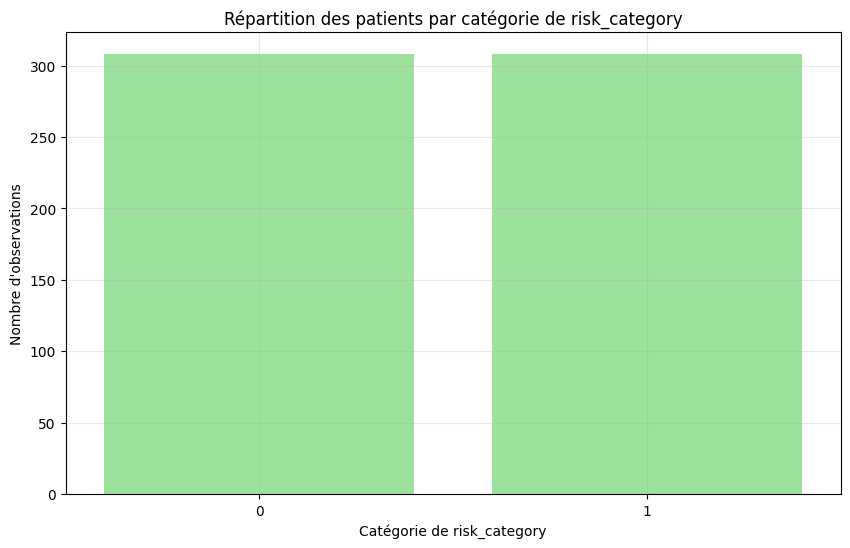

Répartition des risques:
risk_category
0    308
1    308
Name: count, dtype: int64


In [457]:
visualiser_risk_category(pd.DataFrame(y_train_resampled), col="risk_category")

### 3️⃣ Tester les algorithmes suivants : Random Forest, SVM, Gradient Boosting, Decision Tree, Régression Logistique , XGB.

In [458]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [ ]:
def tester_modeles_classification(X_train, X_test, y_train, y_test):
    
    modeles = {
        'RandomForest': RandomForestClassifier(random_state=42),
        'SVM': SVC(random_state=42),
        'GradientBoosting': GradientBoostingClassifier(random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'LogisticRegression': LogisticRegression(random_state=42),
        'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
    }
    
    resultats_scores = {}
    resultats_modeles = {}
    predictions_modeles = {}
    
    for nom, modele in modeles.items():
        modele.fit(X_train, y_train)
        
        y_pred = modele.predict(X_test)
        y_pred_proba = modele.predict_proba(X_test)[:, 1] if hasattr(modele, "predict_proba") else None
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(modele, X_train, y_train, cv=cv, scoring="f1_weighted" )
        
        
        resultats_scores[nom] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            
        }
        
        resultats_modeles[nom] = {
            'modele': modele,
            'predictions': y_pred,
            'predictions_proba': y_pred_proba
            
        }
        
        predictions_modeles[nom] = y_pred
        print(f"\n{nom}" + "="*50 + "\n")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"CV F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        print("\n" + "="*50 + "\n")
    return resultats_scores, resultats_modeles,  predictions_modeles
    



In [464]:

resultats_scores, resultats_modeles, predictions_modeles = tester_modeles_classification(
    X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled
)

Distribution des classes dans y_train: (array([0, 1]), array([308, 308]))
Distribution des classes dans y_test: (array([0, 1]), array([84, 84]))

RandomForest==================================================

Accuracy: 0.9286
Precision: 0.9308
Recall: 0.9286
F1-Score: 0.9285
CV F1-Score: 0.9383 (+/- 0.0300)



SVM==================================================

Accuracy: 0.9762
Precision: 0.9773
Recall: 0.9762
F1-Score: 0.9762
CV F1-Score: 0.9529 (+/- 0.0280)



GradientBoosting==================================================

Accuracy: 0.9107
Precision: 0.9112
Recall: 0.9107
F1-Score: 0.9107
CV F1-Score: 0.9285 (+/- 0.0191)



DecisionTree==================================================

Accuracy: 0.8988
Precision: 0.9016
Recall: 0.8988
F1-Score: 0.8986
CV F1-Score: 0.8586 (+/- 0.0355)



LogisticRegression==================================================

Accuracy: 0.9940
Precision: 0.9941
Recall: 0.9940
F1-Score: 0.9940
CV F1-Score: 0.9870 (+/- 0.0130)



XGBoost===========